# Merge transaction data csv's and preprocessing

In [80]:
import pandas as pd
import glob

# Define a list of patterns for transaction files across directories
transaction_files_patterns = """
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/arbitrum_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_10.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_11.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_12.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_13.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_14.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_15.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_16.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_17.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_18.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_19.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_20.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_21.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_22.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_23.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_24.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_25.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_26.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_27.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_28.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_29.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_30.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_31.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_32.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_33.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_34.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_35.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_36.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_37.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_38.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_39.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_40.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_41.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_42.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_43.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_10.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_11.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_12.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_13.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_14.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_15.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_16.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_17.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_18.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_19.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_20.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_21.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_22.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_23.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_24.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_25.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_26.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_27.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_28.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_29.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_30.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_31.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_32.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_10.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_11.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_12.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_13.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_14.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_15.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_16.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_17.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_18.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_19.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_20.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_21.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_10.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_11.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_12.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_13.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_14.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_15.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_16.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_17.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_18.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_19.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_20.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_21.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_22.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_23.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_24.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_25.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_26.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_27.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_28.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_29.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_30.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_31.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_32.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/arbitrum_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_10.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_10.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_10.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_0.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_1.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_2.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_3.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_4.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_5.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_6.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_7.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_8.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_9.csv
C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_10.csv
""".strip().split('\n')

# Load blacklisted addresses from two CSV files
blacklist_addresses1 = pd.read_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/blacklists/unique_txt_addresses.csv")
blacklist_addresses2 = pd.read_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/blacklists/extracted_addresses.csv")
blacklisted_addresses = set(blacklist_addresses1['Address'].tolist() + blacklist_addresses2['Address'].tolist())

# Function to read, preprocess, and filter transaction files
def read_and_preprocess_transactions(file_path):
    df = pd.read_csv(file_path)
    # Replace '\x' with '0x' in address columns
    df['from'] = df['from'].str.replace(r'\\x', '0x', regex=True)
    df['to'] = df['to'].str.replace(r'\\x', '0x', regex=True)
    return df

# Read all transaction files from all patterns and concatenate into one DataFrame
transactions = pd.concat(
    (read_and_preprocess_transactions(f) for pattern in transaction_files_patterns for f in glob.glob(pattern, recursive=True)),
    ignore_index=True
)

# Count the total number of transactions before filtering
total_transactions_before = len(transactions)

# Filter out transactions involving blacklisted addresses
transactions_filtered = transactions[
    ~transactions['from'].isin(blacklisted_addresses) &
    ~transactions['to'].isin(blacklisted_addresses)
]

# Count the total number of transactions after filtering
total_transactions_after = len(transactions_filtered)

# Display results
print(f"Total transactions before filtering: {total_transactions_before}")
print(f"Total transactions after filtering: {total_transactions_after}")
print(f"Total transactions removed: {total_transactions_before - total_transactions_after}")

# Optionally, save the filtered transactions to a new CSV
# transactions_filtered.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/filtered_transactions_final_v4.csv', index=False)



Total transactions before filtering: 5547174
Total transactions after filtering: 2818428
Total transactions removed: 2728746


In [81]:
import pandas as pd
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt



# Load Sybil and Eligible addresses
sybil_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/eliminatedSybilAttackers.csv'
eligible_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/eligibleAddresses.csv'
sybil_addresses = pd.read_csv(sybil_path)
eligible_addresses = pd.read_csv(eligible_path)

# Construct the graph
G = nx.from_pandas_edgelist(transactions_filtered, 'from', 'to')

# Apply the Louvain method to detect communities
partition = community_louvain.best_partition(G, random_state=69)

# Create a dataframe from the partition
community_df = pd.DataFrame(list(partition.items()), columns=['address', 'community'])

# Add columns to indicate whether an address is Sybil or Eligible
community_df['is_sybil'] = community_df['address'].isin(sybil_addresses['address']).astype(int)
community_df['is_eligible'] = community_df['address'].isin(eligible_addresses['address']).astype(int)

# Group by community to get the size and the count of Sybil and Eligible addresses
community_stats = community_df.groupby('community').agg(
    size=('address', 'size'),
    sybil_count=('is_sybil', 'sum'),
    eligible_count=('is_eligible', 'sum')
).reset_index()

# Sort by community size in descending order
community_stats_sorted = community_stats.sort_values(by='size', ascending=False)

# Print the top 100 communities by size
print("Top 100 communities by size:")
print(community_stats_sorted.head(100))

# Calculate average community size
average_size = community_stats_sorted['size'].mean()
print(f"Average community size: {average_size}")

# Sort by Sybil and Eligible counts and print the top 100
top_sybil_communities = community_stats_sorted.sort_values(by='sybil_count', ascending=False).head(100)
top_eligible_communities = community_stats_sorted.sort_values(by='eligible_count', ascending=False).head(100)

print("Top 100 communities with Sybil addresses:")
print(top_sybil_communities)

print("Top 100 communities with Eligible addresses:")
print(top_eligible_communities)

Top 100 communities by size:
       community  size  sybil_count  eligible_count
3870        3870  6219            1               3
48            48  4561            0              91
16704      16704  4152            0               0
8423        8423  3527            0               3
443          443  2494            0               0
...          ...   ...          ...             ...
3573        3573   804           33              12
101          101   800            0               4
14942      14942   792            0               0
1123        1123   787            0               2
464          464   785            1              16

[100 rows x 4 columns]
Average community size: 14.219921163735318
Top 100 communities with Sybil addresses:
       community  size  sybil_count  eligible_count
19857      19857   881          879               0
3422        3422  1164          609               0
45            45  1084          510               8
418          418   407        

Export data 

In [37]:
# Export all communities that contain Sybil attacker addresses in descending order to a CSV file
sybil_communities = community_stats_sorted[community_stats_sorted['sybil_count'] > 0]
sybil_communities.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/sybilCommunities.csv', index=False)


# Export all communities that contain Eligible addresses to a CSV file
eligible_communities = community_stats_sorted[community_stats_sorted['eligible_count'] > 0]
eligible_communities.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eligibleCommunities.csv', index=False)

In [38]:
# Export all communities that contain either Eligible addresses or Sybil attacker addresses to a CSV file
eligible_sybil_communities = community_stats_sorted[(community_stats_sorted['sybil_count'] > 0) | (community_stats_sorted['eligible_count'] > 0)]
eligible_sybil_communities.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eligibleSybilCommunities.csv', index=False)

In [40]:
import pandas as pd

# Assuming eligible_sybil_communities and community_stats are already defined or loaded
# Here's how you should modify your code based on your provided details



# Ensure eligible_sybil_communities is a standalone DataFrame
eligible_sybil_communities = pd.read_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eligibleSybilCommunities.csv").copy()

# Use .loc to safely assign new values to the 'size' column based on the 'community' mapping
eligible_sybil_communities.loc[:, 'size'] = eligible_sybil_communities['community'].map(community_stats.set_index('community')['size'])

# Export the updated DataFrame to a CSV file
eligible_sybil_communities.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/sybilEligibleAddressesWithSize.csv', index=False)

print("Updated DataFrame with community sizes saved.")


Updated DataFrame with community sizes saved.


Label the addresses with Sybil and non-Sybil

In [41]:
import pandas as pd

# Load the data
merged_data_path = "C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/mergedSybilAndEligible.csv" # Just a merged file of the Sybil and Eligible data
eligible_data_path = "C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/eligibleAddresses.csv"
sybil_data_path = "C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/eliminatedSybilAttackers.csv"

merged_data = pd.read_csv(merged_data_path)
eligible_addresses = pd.read_csv(eligible_data_path)['address'].tolist()
sybil_addresses = pd.read_csv(sybil_data_path)['address'].tolist()

# Label the addresses
merged_data['Label'] = merged_data['address'].apply(lambda x: 'Eligible' if x in eligible_addresses else ('Sybil' if x in sybil_addresses else 'Unknown'))

# Save the labeled data
merged_data.to_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/labeledMergedData.csv", index=False)


Now, I also want to add the metadata from this csv file "C:\Users\elnag\Documents\BAM\Master thesis\HOPdata\addressesMetadataAllUsers.csv" with the columns "address",	"totalTxs", and "totalVolume". 

In [43]:
import pandas as pd

# Load existing data
merged_data_path = "C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedSybilAndEligible.csv"
eligible_data_path = "C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eligibleAddresses.csv"
sybil_data_path = "C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eliminatedSybilAttackers.csv"
metadata_path = "C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/addressesMetadataAllUsers.csv"

merged_data = pd.read_csv(merged_data_path)
eligible_addresses = pd.read_csv(eligible_data_path)['address'].tolist()
sybil_addresses = pd.read_csv(sybil_data_path)['address'].tolist()
metadata = pd.read_csv(metadata_path)

# Label the addresses
merged_data['Label'] = merged_data['address'].apply(lambda x: 'Eligible' if x in eligible_addresses else ('Sybil' if x in sybil_addresses else 'Unknown'))

# Merge metadata with labeled data
# Ensure that the 'address' columns in both data frames are of the same type (string)
merged_data['address'] = merged_data['address'].astype(str)
metadata['address'] = metadata['address'].astype(str)

# Merge the data on 'address'
final_data = pd.merge(merged_data, metadata[['address', 'totalTxs', 'totalVolume']], on='address', how='left')

# Save the merged and labeled data with metadata
final_data.to_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/labeledMergedDataWithMetadata.csv", index=False)

print("Data has been successfully labeled and merged with metadata.")


Data has been successfully labeled and merged with metadata.


In [53]:
import pandas as pd

# Load the previously merged data with metadata
metadata_df = pd.read_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/labeledMergedDataWithMetadata.csv")


# Merge the community data with the metadata, using a left join to keep all metadata entries
merged_df = metadata_df.merge(community_df, on='address', how='left')

# For addresses not found in the community_df, fill with 'no community'
merged_df['community'].fillna('no community', inplace=True)

# Save the updated DataFrame
merged_df.to_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityMetadata.csv", index=False)

print("Updated DataFrame with community numbers saved.")


Updated DataFrame with community numbers saved.


In [56]:

import pandas as pd

# Filter out addresses that do not belong to any community
filtered_df = merged_df[merged_df['community'] != 'no community']

# Save the updated DataFrame
filtered_df.to_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityMetadata_filtered.csv", index=False)

print("Updated DataFrame with community filtering saved.")






Updated DataFrame with community filtering saved.


In [57]:
import pandas as pd

# Load the dataframes
eligible_sybil_communities_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eligibleSybilCommunities.csv')
merged_with_community_metadata_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityMetadata_filtered.csv')

# Make sure that 'community' is an integer in both dataframes if they are not strings
eligible_sybil_communities_df['community'] = eligible_sybil_communities_df['community'].astype(int)
merged_with_community_metadata_df['community'] = merged_with_community_metadata_df['community'].astype(int)

# Left join the 'size' column based on the 'community' column
merged_df_with_size = pd.merge(
    merged_with_community_metadata_df,
    eligible_sybil_communities_df[['community', 'size']],
    on='community',
    how='left'
)

# Save the updated dataframe to a new CSV file
merged_df_with_size.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityAndSize.csv', index=False)


In [76]:
import pandas as pd

# Load the addresses DataFrame and preprocess the address format if needed
addresses_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityAndSize.csv'
addresses_df = pd.read_csv(addresses_path)
addresses_df['address'] = addresses_df['address'].str.replace(r'\\x', '0x', regex=True)

# Initialize and count transaction columns
networks = ['XDAI', 'Polygon', 'OP', 'ETH', 'ARB']
for net in networks:
    addresses_df[f'{net}_totalNativeTxs'] = 0
    addresses_df[f'{net}_totalERC20Txs'] = 0
    addresses_df[f'{net}_activity'] = False

# Function to count transactions for native and ERC-20 tokens
def count_transactions(network, transaction_paths, addresses_df, native):
    column_name = f'{net}_totalNativeTxs' if native else f'{net}_totalERC20Txs'
    transactions_count = pd.Series(dtype=int)
    for file_path in transaction_paths:
        transactions = pd.read_csv(file_path.strip())
        transactions['to'] = transactions['to'].str.replace(r'\\x', '0x', regex=True)
        transactions['from'] = transactions['from'].str.replace(r'\\x', '0x', regex=True)
        transactions_count = transactions_count.add(pd.concat([transactions['to'], transactions['from']]).value_counts(), fill_value=0)
    
    addresses_df[column_name] += addresses_df['address'].map(transactions_count).fillna(0).astype(int)
    addresses_df[f'{net}_activity'] |= addresses_df[column_name] > 0

# Paths for native and ERC-20 transactions, adapt this part to your specific paths
native_files = {
    'XDAI': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/xdai_batch_10.csv
    """.strip().split('\n'),
    'Polygon': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/polygon_batch_10.csv
    """.strip().split('\n'),
    'OP': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/optimism_batch_10.csv
    """.strip().split('\n'),
    'ETH': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/ethereum_batch_10.csv
    """.strip().split('\n'),
    'ARB': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/nativeTokenTransfers/arbitrum_batch_0.csv
    """.strip().split('\n'),
} # Add other networks similarly
erc20_files = {
    'XDAI': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_10.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_11.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_12.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_13.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_14.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_15.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_16.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_17.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_18.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_19.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_20.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_21.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_22.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_23.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_24.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_25.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_26.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_27.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_28.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_29.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_30.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_31.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/xdai_batch_32.csv
    """.strip().split('\n'),
    'Polygon': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_10.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_11.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_12.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_13.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_14.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_15.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_16.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_17.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_18.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_19.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_20.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/polygon_batch_21.csv
    """.strip().split('\n'),
    'OP': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_10.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_11.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_12.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_13.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_14.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_15.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_16.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_17.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_18.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_19.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_20.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_21.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_22.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_23.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_24.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_25.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_26.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_27.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_28.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_29.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_30.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_31.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/optimism_batch_32.csv
    """.strip().split('\n'),
    'ETH': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_0.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_1.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_2.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_3.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_4.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_5.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_6.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_7.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_8.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_9.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_10.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_11.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_12.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_13.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_14.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_15.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_16.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_17.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_18.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_19.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_20.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_21.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_22.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_23.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_24.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_25.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_26.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_27.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_28.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_29.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_30.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_31.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_32.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_33.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_34.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_35.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_36.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_37.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_38.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_39.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_40.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_41.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_42.csv
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/ethereum_batch_43.csv
    """.strip().split('\n'),
    'ARB': """
    C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/transfers/erc20TokenTransfers/arbitrum_batch_0.csv
    """.strip().split('\n'),
}
# Count transactions for each network, both native and ERC-20
for net in networks:
    count_transactions(net, native_files.get(net, []), addresses_df, native=True)
    count_transactions(net, erc20_files.get(net, []), addresses_df, native=False)

column_order = [f'{net}_activity' for net in networks] + [f'{net}_totalNativeTxs' for net in networks] + [f'{net}_totalERC20Txs' for net in networks]

# Ensure this order is correct in the DataFrame
addresses_df = addresses_df[[col for col in addresses_df.columns if col not in column_order] + column_order]

# Save the updated DataFrame
addresses_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/updated_addresses_with_transaction_counts.csv', index=False)
print("Transaction counts updated and saved successfully.")




Transaction counts updated and saved successfully.


Final fetching from Moralis API

In [78]:
import pandas as pd

# Load the addresses data
addresses_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/updated_addresses_with_transaction_counts.csv')

# Filter addresses with 'size' equal or larger than 20
filtered_addresses_df = addresses_df[addresses_df['size'] >= 20]

# Save the filtered DataFrame to a CSV file
filtered_addresses_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/addresses_final.csv', index=False)

print("Filtered addresses saved successfully.")

Filtered addresses saved successfully.


# Data Fetching Moralis API

In [79]:
import pandas as pd
from moralis import evm_api

api_key = "API_KEY_NOT_PROVIDED_FOR_PRIVACY" 

# Load the DataFrame from your CSV
addresses_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/addresses_final.csv')

# Set up a list to hold the API response data
all_transactions = []

# Define the chains and their corresponding activity columns
chains = {
    'eth': 'ETH_activity',
    'polygon': 'Polygon_activity',
    'gnosis': 'XDAI_activity',
    'optimism': 'OP_activity',
    'arbitrum': 'ARB_activity'
}

# Loop through the addresses and requested chains if activity is marked True
for index, row in addresses_df.iterrows():
    address = row['address']
    for chain, activity_col in chains.items():
        if row.get(activity_col) == True:  # Make sure the column exists and activity is True
            try:
                # Fetch the transactions ordered by ascending order to get the first ones
                params = {
                    "chain": chain,
                    "order": "ASC",  # Order by ascending to get the first transactions first
                    "to_date": "2022-04-01T00:00:00Z",
                    "limit": 1,  # Fetch the first transaction
                    "address": address
                }
                result = evm_api.transaction.get_wallet_transactions(
                    api_key=api_key,
                    params=params
                )
                # Assuming the result is a list of transactions
                for transaction in result.get('result', []):
                    transaction['chain'] = chain  # Add chain info for clarity in the CSV
                    all_transactions.append(transaction)
            except Exception as e:
                print(f"Error fetching transactions for {address} on {chain.capitalize()}: {e}")

# Convert the list of transactions to a DataFrame
transactions_df = pd.DataFrame(all_transactions)

# Save to CSV
transactions_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/addresses_metadata_final.csv', index=False)

print("Transactions fetched and saved successfully.")


Error fetching transactions for 0x03934049d46930a552095219ad2f5dba87b8bb8f on Optimism: (500)
Reason: Internal Server Error
HTTP response headers: HTTPHeaderDict({'Date': 'Wed, 12 Jun 2024 01:40:03 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '74', 'Connection': 'keep-alive', 'X-Powered-By': 'Express', 'Access-Control-Allow-Origin': '*', 'x-request-weight': '30', 'ETag': 'W/"4a-Trwd3CpM6Dtz6UyrDapRSOVLBxo"', 'Vary': 'Accept-Encoding', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '892621335d7e1caa-AMS'})
HTTP response body: b'{"message":"Unknown error occurred. Please try again or contact support."}'

Error fetching transactions for 0x354aed6a95445f531238cc5e8adf260234892ecd on Gnosis: (500)
Reason: Internal Server Error
HTTP response headers: HTTPHeaderDict({'Date': 'Wed, 12 Jun 2024 05:32:04 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '74', 'Connection': 'keep-alive', 'X-Powered-By': 'Express', 'Access-Con

In [81]:
import pandas as pd

# Load the addresses data and filter to include only the first 10 addresses
addresses_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/addresses_final.csv')
addresses_list = addresses_df['address'].tolist()

# Load the transactions data
transactions_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/addresses_metadata_final.csv')

# Filter transactions to include only those involving addresses in the first 10 addresses list
filtered_transactions_df = transactions_df[(transactions_df['to_address'].isin(addresses_list)) | 
                                           (transactions_df['from_address'].isin(addresses_list))]

# Initialize an empty list to store the results
results = []

# Loop through each address
for address in addresses_list:
    # Filter transactions where the address is either the sender or the receiver
    address_transactions = filtered_transactions_df[(filtered_transactions_df['to_address'] == address) | 
                                                    (filtered_transactions_df['from_address'] == address)]
    if not address_transactions.empty:
        # Sort these transactions by block timestamp to find the first transaction
        sorted_transactions = address_transactions.sort_values(by='block_timestamp')
        first_tx = sorted_transactions.iloc[0]

        # Extract the required features
        activation_date = first_tx['block_timestamp']
        funding_amount = first_tx['value']
        funding_address = first_tx['from_address'] if first_tx['to_address'] == address else first_tx['to_address']
        funding_address_label = first_tx.get('from_address_label', '') if first_tx['to_address'] == address else first_tx.get('to_address_label', '')
        activation_chain = first_tx['chain']

        # Extract the metadata
        metadata = addresses_df[addresses_df['address'] == address].iloc[0]

        # Append the results to the list
        results.append({
            'address': address,
            'Label': metadata['Label'],
            'community': metadata['community'],
            'size': metadata['size'],
            'activation_date': activation_date,
            'funding_amount': funding_amount,
            'funding_address': funding_address,
            'funding_address_label': funding_address_label,
            'activation_chain': activation_chain,
            'totalTxs': metadata['totalTxs'],
            'totalVolume': metadata['totalVolume'],
            'XDAI_activity': metadata['XDAI_activity'],
            'Polygon_activity': metadata['Polygon_activity'],
            'OP_activity': metadata['OP_activity'],
            'ETH_activity': metadata['ETH_activity'],
            'ARB_activity': metadata['ARB_activity'],
            'XDAI_totalNativeTxs': metadata['XDAI_totalNativeTxs'],
            'Polygon_totalNativeTxs': metadata['Polygon_totalNativeTxs'],
            'OP_totalNativeTxs': metadata['OP_totalNativeTxs'],
            'ETH_totalNativeTxs': metadata['ETH_totalNativeTxs'],
            'ARB_totalNativeTxs': metadata['ARB_totalNativeTxs'],
            'XDAI_totalERC20Txs': metadata['XDAI_totalERC20Txs'],
            'Polygon_totalERC20Txs': metadata['Polygon_totalERC20Txs'],
            'OP_totalERC20Txs': metadata['OP_totalERC20Txs'],
            'ETH_totalERC20Txs': metadata['ETH_totalERC20Txs'],
            'ARB_totalERC20Txs': metadata['ARB_totalERC20Txs']
        })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv', index=False)

print("Activation features extracted and saved successfully.")




Activation features extracted and saved successfully.


DBSCAN

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode 'activation_chain' and 'funding_address' as categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9  # Convert to seconds since epoch

# Standardize the data
scaler = StandardScaler()

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

# Loop over each community
for community in df['community'].unique():
    community_df = df[df['community'] == community].copy()
    
    if len(community_df) < 2:
        # Skip communities with less than 2 addresses
        continue

    # Standardize the features
    X = scaler.fit_transform(community_df[required_columns[:-1]])  # Exclude 'community' from features
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    community_df['cluster'] = dbscan.fit_predict(X)
    
    # Calculate silhouette score
    if len(set(dbscan.labels_)) > 1:
        silhouette_avg = silhouette_score(X, dbscan.labels_)
    else:
        silhouette_avg = -1  # Cannot compute silhouette score with less than 2 clusters
    
    # Add silhouette score to the community DataFrame
    community_df['silhouette_score'] = silhouette_avg
    
    # Append to the results DataFrame
    results_df = pd.concat([results_df, community_df])

# Save the results to a CSV file
results_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/dbscan_results.csv', index=False)

print("DBSCAN clustering and silhouette scores calculated and saved successfully.")

DBSCAN clustering and silhouette scores calculated and saved successfully.


Number of addresses with a silhouette score greater than 0.7: 2537


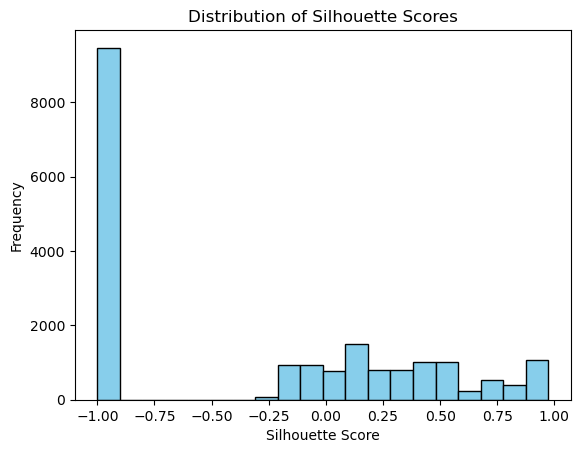

In [4]:
import pandas as pd

# HOw many addresses have a Silhoutte score greater than 0.7
results_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/dbscan_results.csv')
high_silhouette_scores = results_df[results_df['silhouette_score'] > 0.5]
num_high_silhouette_scores = len(high_silhouette_scores)
print(f"Number of addresses with a silhouette score greater than 0.7: {num_high_silhouette_scores}")

# Plot the distribution of silhouette scores
import matplotlib.pyplot as plt

plt.hist(results_df['silhouette_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores')
plt.show()



OPTICS

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

# Load the DBSCAN results with Silhouette scores and other features
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/dbscan_results.csv')

# Select communities with Silhouette score < 0.7
filtered_df = df[df['silhouette_score'] < 1]

# Select relevant features for clustering
features_df = filtered_df[['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                           'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']]

# Assuming 'activation_date' is already in UNIX timestamp format and does not need conversion
# If not, convert other date formats to UNIX timestamp here appropriately

# Convert categorical data to numerical data if necessary
features_df['funding_address'] = pd.factorize(features_df['funding_address'])[0]  # Convert addresses to categorical codes

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df.drop(['community'], axis=1))

# Perform OPTICS clustering
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clusters = optics.fit_predict(scaled_features)

# Append clusters back to the dataframe
filtered_df['subcluster'] = clusters

# Optionally save or inspect the clusters
filtered_df.to_csv('subclustered_data.csv', index=False)

print("Subclusters within communities with low silhouette scores identified and saved.")



C:\Users\elnag\AppData\Local\Temp\ipykernel_26740\969509469.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['funding_address'] = pd.factorize(features_df['funding_address'])[0]  # Convert addresses to categorical codes


Subclusters within communities with low silhouette scores identified and saved.


Filter

In [18]:
import pandas as pd

# Load your DataFrame that includes community, subcluster, and other data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/subclustered_data.csv')

# Group by 'community' and 'subcluster', and filter groups with size >= 20
filtered_df = df.groupby(['community', 'subcluster']).filter(lambda x: len(x) >= 20)

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())

# If needed, you can perform further analysis or manipulation with filtered_df here

# Save the filtered DataFrame to a new CSV file for future use
filtered_df.to_csv('filtered_communities_subclusters_20.csv', index=False)

print("Filtered DataFrame with subclusters of size 10 or more has been saved.")



                                       address  Label  community  size  \
88  0x0002d1b7e87d2ffcd659d97ba27f314f62160a09  Sybil       2080   127   
89  0x01bab370fa6c9962ed14ad13d3a4894bc833d41d  Sybil       2080   127   
90  0x05aaa72c69eec95ce05238efcb6f95d1451181cc  Sybil       2080   127   
91  0x063d0af209577e4167ecca50b55cfdb4c0ff15c6  Sybil       2080   127   
92  0x08021947ac1eb6815a027e1ad9de7ecf8d5acecd  Sybil       2080   127   

    activation_date        funding_amount  funding_address  \
88       1628509039  17360000000000000000            11216   
89       1628558875  42000000000000000000             5113   
90       1628576307  39000000000000000000             4097   
91       1628584473  15000000000000000000             2578   
92       1628502261  32000000000000000000            10613   

   funding_address_label  activation_chain  totalTxs  ...  ETH_totalNativeTxs  \
88                   NaN                 4         4  ...                   2   
89                  

In [23]:
# Print how many Sybil addresses and how many non-Sybil addresses are in filtered_communities_subclusters.csv
import pandas as pd

# Load the filtered DataFrame
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/filtered_communities_subclusters_20.csv')

# Count the number of Sybil and non-Sybil addresses

sybil_count = df['Label'].value_counts().get('Sybil', 0)
non_sybil_count = df['Label'].value_counts().get('Eligible', 0)

print(f"Number of Sybil addresses: {sybil_count}")
print(f"Number of Non-Sybil addresses: {non_sybil_count}")


Number of Sybil addresses: 7333
Number of Non-Sybil addresses: 507


Index(['address', 'Label', 'community', 'size', 'activation_date',
       'funding_amount', 'funding_address', 'funding_address_label',
       'activation_chain', 'totalTxs', 'totalVolume', 'XDAI_activity',
       'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity',
       'XDAI_totalNativeTxs', 'Polygon_totalNativeTxs', 'OP_totalNativeTxs',
       'ETH_totalNativeTxs', 'ARB_totalNativeTxs', 'XDAI_totalERC20Txs',
       'Polygon_totalERC20Txs', 'OP_totalERC20Txs', 'ETH_totalERC20Txs',
       'ARB_totalERC20Txs', 'cluster', 'silhouette_score', 'subcluster'],
      dtype='object')
Statistical Summary of Silhouette Scores:
           count      mean       std  min      25%       50%       75%  \
Label                                                                    
Eligible   507.0 -0.229674  0.506523 -1.0 -1.00000 -0.067917  0.135219   
Sybil     7333.0  0.301672  0.469980 -1.0  0.04126  0.351177  0.699645   

               max  
Label               
Eligible  0.787235 

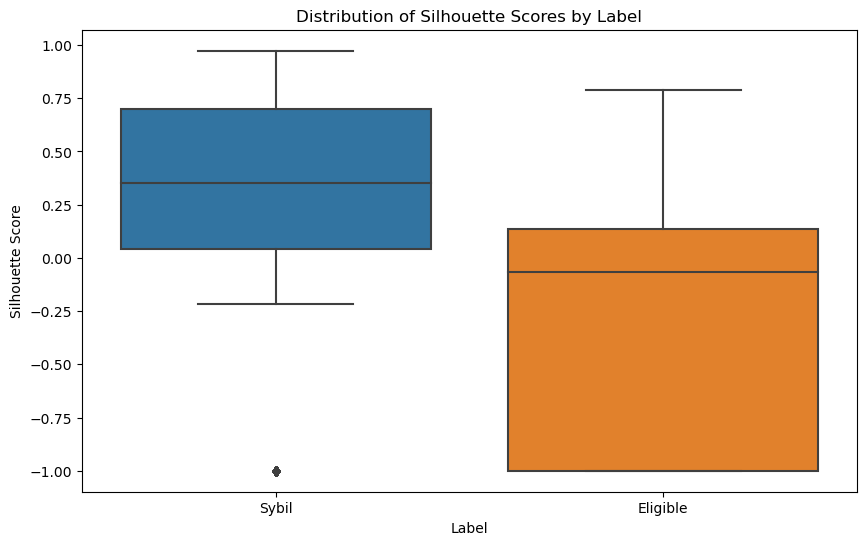

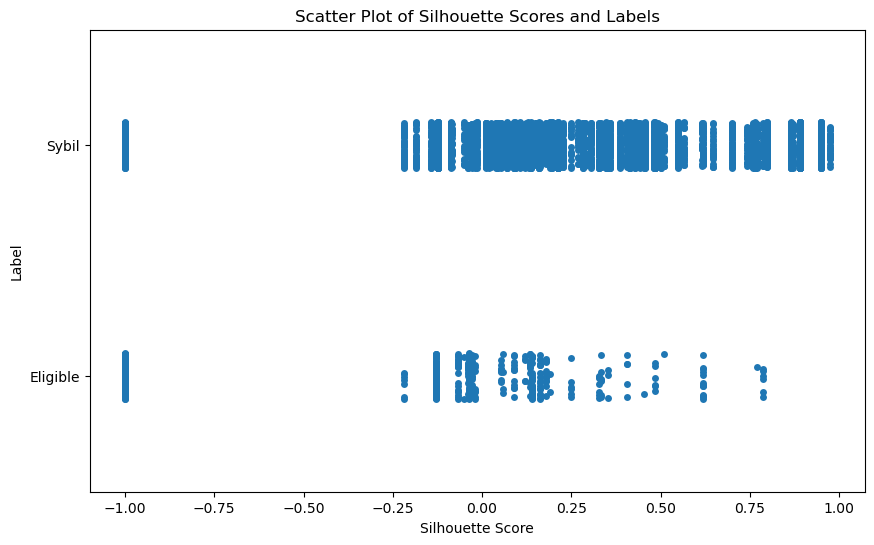

Correlation coefficient between Silhouette Score and Label: 0.2666335324591413


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered data
df = pd.read_csv('filtered_communities_subclusters_20.csv')

# Check the columns to ensure you have the correct names
print(df.columns)

# Adjust for 'Label' which contains 'Sybil' or 'Eligible'
print("Statistical Summary of Silhouette Scores:")
print(df.groupby('Label')['silhouette_score'].describe())

# Visualization with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='silhouette_score', data=df)
plt.title('Distribution of Silhouette Scores by Label')
plt.xlabel('Label')
plt.ylabel('Silhouette Score')
plt.show()

# Scatter plot to see the distribution
plt.figure(figsize=(10, 6))
sns.stripplot(x='silhouette_score', y='Label', data=df, jitter=True)
plt.title('Scatter Plot of Silhouette Scores and Labels')
plt.xlabel('Silhouette Score')
plt.ylabel('Label')
plt.show()

# Calculate the correlation coefficient, if applicable
# Note: To calculate a correlation, you may need to encode 'Label' as a binary variable.
df['Label_encoded'] = df['Label'].apply(lambda x: 1 if x == 'Sybil' else 0)
correlation = df['silhouette_score'].corr(df['Label_encoded'])
print(f"Correlation coefficient between Silhouette Score and Label: {correlation}")



In [26]:
# HOw many Sybil addresses have a Silhoutte score of -1
sybil_df = df[df['Label'] == 'Sybil']
sybil_negative_silhouette = sybil_df[sybil_df['silhouette_score'] == -1]
num_sybil_negative_silhouette = len(sybil_negative_silhouette)
print(f"Number of Sybil addresses with a silhouette score of -1: {num_sybil_negative_silhouette}")


Number of Sybil addresses with a silhouette score of -1: 428


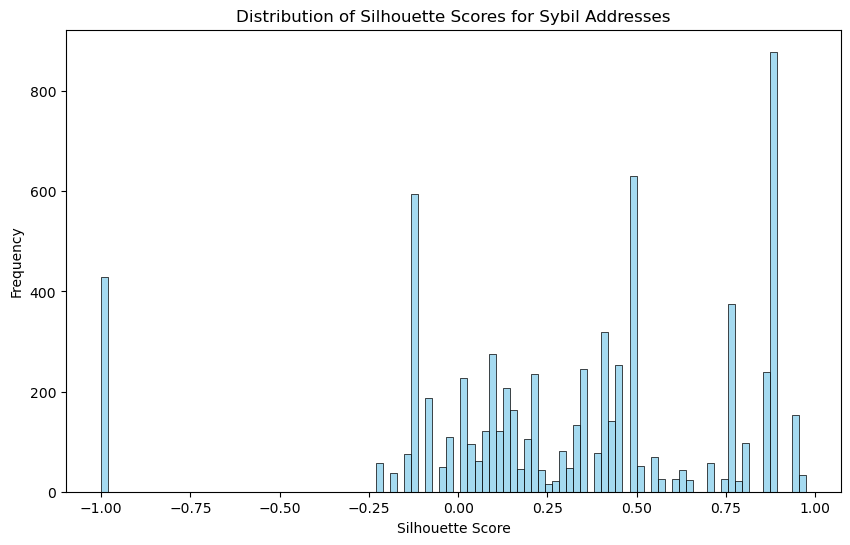

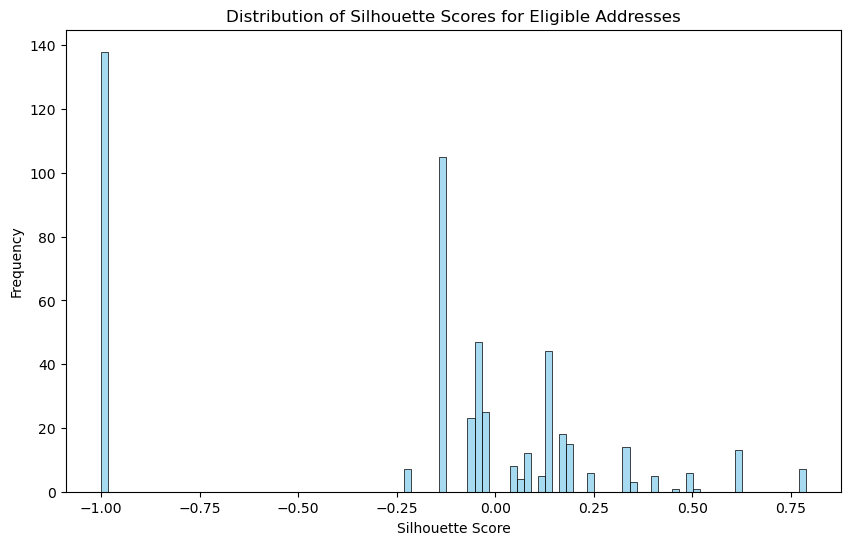

In [28]:
# Plot distribution of silhouette scores for Sybil addresses
plt.figure(figsize=(10, 6))
sns.histplot(sybil_df['silhouette_score'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores for Sybil Addresses')
plt.show()

# Plot distribution of silhouette scores for Eligible addresses
eligible_df = df[df['Label'] == 'Eligible']
plt.figure(figsize=(10, 6))
sns.histplot(eligible_df['silhouette_score'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores for Eligible Addresses')
plt.show()


In [31]:
# Calculate the false postive rate if we consider all addresses without a silhouette score of -1 as Sybil
all_addresses = df[df['silhouette_score'] != -1]
false_positive_rate = len(all_addresses[all_addresses['Label'] == 'Eligible']) / len(all_addresses)
print(f"False Positive Rate: {false_positive_rate}")

# Compute how many Sybils would be identified if we consider all addresses without a silhouette score of -1 as Sybil
identified_sybils = len(all_addresses[all_addresses['Label'] == 'Sybil'])
print(f"Identified Sybils: {identified_sybils}")


False Positive Rate: 0.050728622491064065
Identified Sybils: 6905


In [37]:
# Calculate the false postive rate if we consider all addresses with a score > 0.5 as Sybil
all_addresses = df[df['silhouette_score'] > 0.5]
false_positive_rate = len(all_addresses[all_addresses['Label'] == 'Eligible']) / len(all_addresses)
print(f"False Positive Rate: {false_positive_rate}")


# Compute how many Sybils would be identified if we consider all addresses with a score > 0 as Sybil
identified_sybils = len(all_addresses[all_addresses['Label'] == 'Sybil'])
print(f"Identified Sybils: {identified_sybils}")



False Positive Rate: 0.009813084112149532
Identified Sybils: 2119


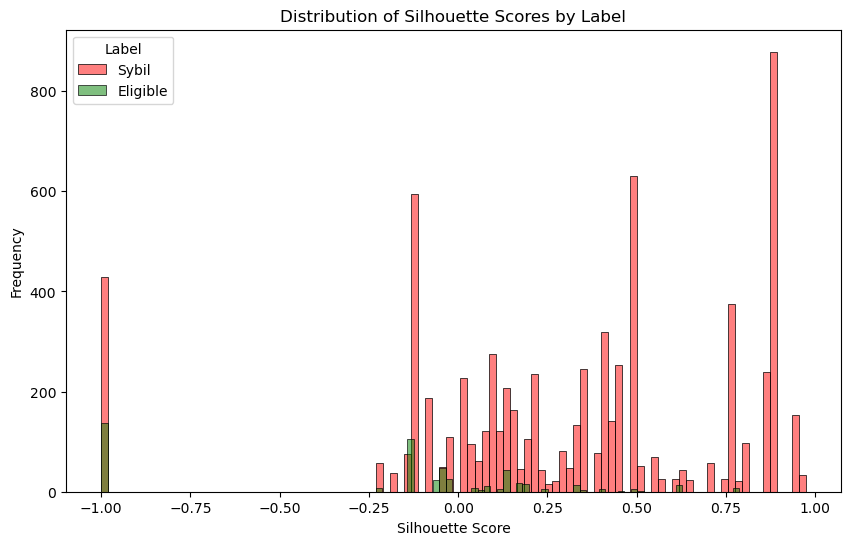

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded
sybil_df = df[df['Label'] == 'Sybil']
eligible_df = df[df['Label'] == 'Eligible']

plt.figure(figsize=(10, 6))
sns.histplot(sybil_df['silhouette_score'], bins=100, color='red', label='Sybil', edgecolor='black', alpha=0.5)
sns.histplot(eligible_df['silhouette_score'], bins=100, color='green', label='Eligible', edgecolor='black', alpha=0.5)

plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores by Label')
plt.legend(title='Label')
plt.show()


t-SNE

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Ensure the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode 'activation_chain' and 'funding_address' as categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Convert 'activation_date' to datetime and then to Unix timestamp
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['activation_date', 'totalTxs', 'totalVolume']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Cluster within each community
for community in df['community'].unique():
    community_df = df[df['community'] == community].copy()
    
    if len(community_df) < 2:
        continue  # Skip communities with less than 2 addresses

    # Standardize the features
    X = scaler.fit_transform(community_df[required_columns[:-1]])  # Exclude 'community' from features
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    community_df['cluster'] = dbscan.fit_predict(X)
    
    # Calculate silhouette score
    if len(set(dbscan.labels_)) > 1:
        silhouette_avg = silhouette_score(X, dbscan.labels_)
    else:
        silhouette_avg = -1  # Cannot compute silhouette score with less than 2 clusters
    
    # Add silhouette score to the community DataFrame
    community_df['silhouette_score'] = silhouette_avg
    
    # Append to the results DataFrame
    results_df = pd.concat([results_df, community_df])

# Save the results to a CSV file
results_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/dbscan_results_v2.csv', index=False)

print("DBSCAN clustering and silhouette scores calculated and saved successfully.")


DBSCAN clustering and silhouette scores calculated and saved successfully.


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Ensure all necessary columns are included
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']

# Convert boolean columns to integers
boolean_cols = ['XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity']
df[boolean_cols] = df[boolean_cols].astype(int)

# Label encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Convert 'activation_date' to a numerical format if necessary
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9

# Select and standardize features for t-SNE
numeric_features = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume'] + boolean_cols
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Initialize t-SNE with a suitable perplexity, which might need adjustment based on your data volume
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Adjust the perplexity and random_state as needed

# Apply t-SNE only on the numeric features
tsne_results = tsne.fit_transform(df[numeric_features])

# Prepare DataFrame for plotting
df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]

# Plotting
plt.figure(figsize=(16, 10))
communities = df['community'].unique()
# Generate a color palette with a distinct color for each community
palette = plt.cm.get_cmap('tab20', len(communities))

for i, community in enumerate(communities):
    subset = df[df['community'] == community]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'], s=50, color=palette(i), label=f'Community {community}')

plt.legend(title='Community')
plt.title('t-SNE Visualization of Addresses by Community')
plt.xlabel('TSNE-2D-One')
plt.ylabel('TSNE-2D-Two')
plt.show()


C:\Users\elnag\AppData\Local\Temp\ipykernel_3752\3614878772.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('tab20', len(communities))


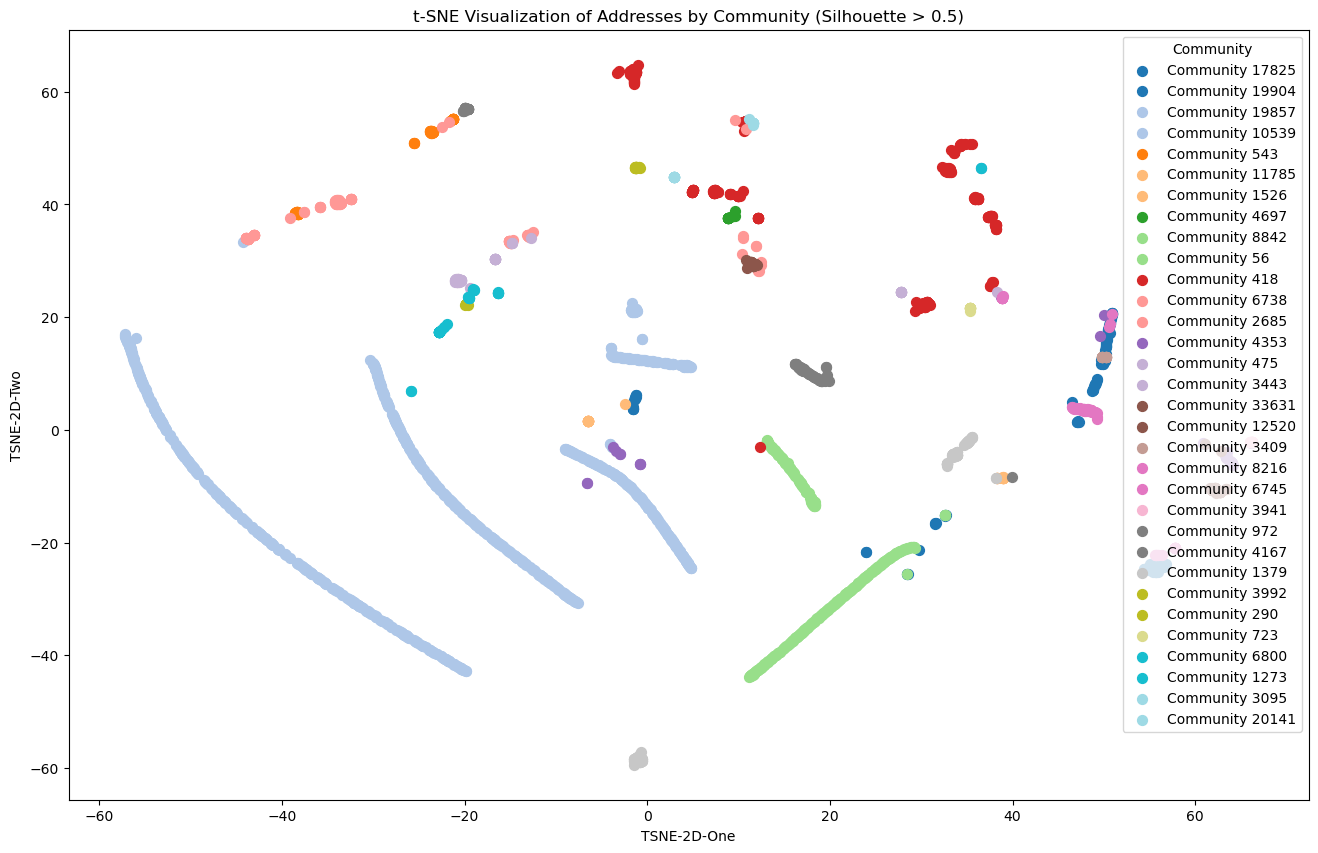

In [16]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/filtered_communities_subclusters.csv")


# Filter for communities with a silhouette score greater than 0.5
df = df[df['silhouette_score'] > 0.5]

# Ensure all necessary columns are included
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']

# Convert boolean columns to integers
boolean_cols = ['XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity']
df[boolean_cols] = df[boolean_cols].astype(int)

# Label encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Convert 'activation_date' to a numerical format if necessary
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9

# Select and standardize features for t-SNE
numeric_features = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume', 'subcluster'] + boolean_cols
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Initialize t-SNE with a suitable perplexity, which might need adjustment based on your data volume
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Adjust the perplexity and random_state as needed

# Apply t-SNE only on the numeric features
tsne_results = tsne.fit_transform(df[numeric_features])

# Prepare DataFrame for plotting
df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]

# Plotting
plt.figure(figsize=(16, 10))
communities = df['community'].unique()
# Generate a color palette with a distinct color for each community
palette = plt.cm.get_cmap('tab20', len(communities))

for i, community in enumerate(communities):
    subset = df[df['community'] == community]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'], s=50, color=palette(i), label=f'Community {community}')

plt.legend(title='Community')
plt.title('t-SNE Visualization of Addresses by Community (Silhouette > 0.5)')
plt.xlabel('TSNE-2D-One')
plt.ylabel('TSNE-2D-Two')
plt.show()



More plots and figures for EDA

                                  Metric         Value
0            Total number of communities  14603.000000
1                 Average community size     28.597754
2                  Median community size      7.000000
3                 Minimum community size      1.000000
4                 Maximum community size   6219.000000
5   Number of communities with size ≥ 20   2733.000000
6  Number of communities with size ≥ 100    587.000000


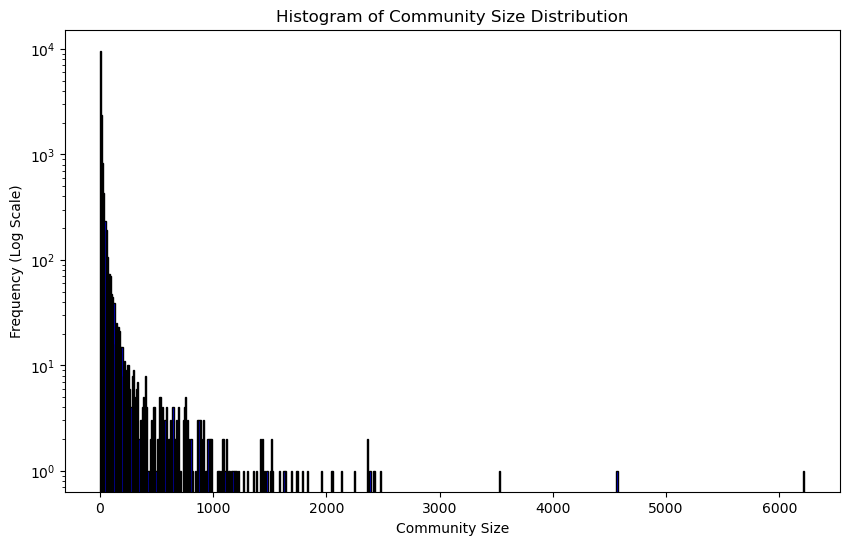

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
community_data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/sybilEligibleAddressesWithSize.csv'
community_stats = pd.read_csv(community_data_path)

# Calculate required statistics for Table 1
total_communities = len(community_stats)
average_size = community_stats['size'].mean()
median_size = community_stats['size'].median()
min_size = community_stats['size'].min()
max_size = community_stats['size'].max()
communities_over_20 = (community_stats['size'] >= 20).sum()
communities_over_100 = (community_stats['size'] >= 100).sum()

# Create Table 1 DataFrame
table1_data = {
    'Metric': [
        'Total number of communities',
        'Average community size',
        'Median community size',
        'Minimum community size',
        'Maximum community size',
        'Number of communities with size ≥ 20',
        'Number of communities with size ≥ 100'
    ],
    'Value': [
        total_communities,
        average_size,
        median_size,
        min_size,
        max_size,
        communities_over_20,
        communities_over_100
    ]
}
table1 = pd.DataFrame(table1_data)
print(table1)

# Plotting the histogram for community sizes
plt.figure(figsize=(10, 6))
plt.hist(community_stats['size'], bins=range(int(min_size), int(max_size) + 10, 10), color='blue', edgecolor='black')
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Community Size')
plt.ylabel('Frequency (Log Scale)')  # Update y label
plt.title('Histogram of Community Size Distribution')
plt.show()


In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/filtered_communities_subclusters_20.csv')

# Define the parameter settings for silhouette scores
silhouette_thresholds = [0, 0.25, 0.5]

# Initialize a list to store results
results = []

# Loop through each threshold and calculate community statistics
for threshold in silhouette_thresholds:
    # Filter data by silhouette score
    filtered_df = df[df['silhouette_score'] > threshold]

    # Count unique communities
    number_of_communities = filtered_df['community'].nunique()
    
    # Count wallets identified as Sybils (assuming 'Label' column has this info)
    number_of_sybils = filtered_df[filtered_df['Label'] == 'Sybil'].shape[0]
    
    # Calculate false positive rate
    total_identified = filtered_df.shape[0]
    false_positives = filtered_df[(filtered_df['Label'] == 'Eligible')].shape[0]
    false_positive_rate = (false_positives / total_identified) * 100 if total_identified > 0 else 0

    # Append results
    results.append({
        'Parameter Setting': f'eps = 0.5, min_samples = 5, silhouette > {threshold}',
        'Number of Communities': number_of_communities,
        'Number of Wallets Identified as Sybils': number_of_sybils,
        'False Positive Rate': f'{false_positive_rate:.2f}%'
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print(results_df)

# Optionally save to CSV
results_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/clustering_results.csv', index=False)




                               Parameter Setting  Number of Communities  \
0     eps = 0.5, min_samples = 5, silhouette > 0                     83   
1  eps = 0.5, min_samples = 5, silhouette > 0.25                     46   
2   eps = 0.5, min_samples = 5, silhouette > 0.5                     20   

   Number of Wallets Identified as Sybils False Positive Rate  
0                                    5794               2.72%  
1                                    4071               1.21%  
2                                    2119               0.98%  


In [48]:
# COmpute how many unique communities there are in df
unique_communities = df['community'].nunique()
print(f"Number of unique communities: {unique_communities}")


Number of unique communities: 121


In [49]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Load the data
data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/filtered_communities_subclusters_20.csv'
df = pd.read_csv(data_path)

# Define parameter settings and their silhouette score thresholds
parameter_settings = {
    "eps = 0.5, min_samples = 5, silhouette > 0": 0,
    "eps = 0.5, min_samples = 5, silhouette > 0.25": 0.25,
    "eps = 0.5, min_samples = 5, silhouette > 0.5": 0.5
}

results = []

# Compute metrics for each parameter setting
for settings, silhouette_threshold in parameter_settings.items():
    # Create a new column 'predicted_label' based on silhouette score threshold
    df['predicted_label'] = (df['silhouette_score'] > silhouette_threshold).astype(int)  # 1 for Sybil, 0 for not Sybil

    # True labels, assuming 'Sybil' addresses are the positive class
    y_true = (df['Label'] == 'Sybil').astype(int)
    
    # Predicted labels
    y_pred = df['predicted_label']

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # handle division by zero
    fpr = fp / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    results.append({
        "Parameter Setting": settings,
        "TPR": tpr,
        "FPR": fpr,
        "Accuracy": accuracy,
        "F1 Score": f1
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print and save the results
print(results_df)
results_df.to_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/evaluation_ground_truth.csv', index=False)


                               Parameter Setting       TPR       FPR  \
0     eps = 0.5, min_samples = 5, silhouette > 0  0.790127  0.319527   
1  eps = 0.5, min_samples = 5, silhouette > 0.25  0.555162  0.098619   
2   eps = 0.5, min_samples = 5, silhouette > 0.5  0.288968  0.041420   

   Accuracy  F1 Score  
0  0.783036  0.871999  
1  0.577551  0.710843  
2  0.332270  0.447377  


In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the data
data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/filtered_communities_subclusters_20.csv'
df = pd.read_csv(data_path)

# Assume 'Sybil' as positive (1) and any other label as negative (0)
df['true_label'] = (df['Label'] == 'Sybil').astype(int)

# Define thresholds and parameters
settings = [
    {'silhouette_threshold': 0},
    {'silhouette_threshold': 0.25},
    {'silhouette_threshold': 0.5}
]

results = []

for setting in settings:
    # Predict labels based on silhouette score threshold
    df['predicted_label'] = (df['silhouette_score'] > setting['silhouette_threshold']).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(df['true_label'], df['predicted_label'])
    f1 = f1_score(df['true_label'], df['predicted_label'], zero_division=1)
    tn, fp, fn, tp = confusion_matrix(df['true_label'], df['predicted_label']).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    results.append({
        'Parameter Setting': f"eps = 0.5, min_samples = 5, silhouette > {setting['silhouette_threshold']}",
        'TPR': tpr,
        'FPR': fpr,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save or further process the DataFrame
# results_df.to_csv('evaluation_metrics.csv', index=False)

# Save the true and predicted label to a csv file
df[['address', 'community', 'size', 'silhouette_score', 'true_label', 'predicted_label']].to_csv('true_predicted_labels.csv', index=False)





                               Parameter Setting       TPR       FPR  \
0     eps = 0.5, min_samples = 5, silhouette > 0  0.790127  0.319527   
1  eps = 0.5, min_samples = 5, silhouette > 0.25  0.555162  0.098619   
2   eps = 0.5, min_samples = 5, silhouette > 0.5  0.288968  0.041420   

   Accuracy  F1 Score  
0  0.783036  0.871999  
1  0.577551  0.710843  
2  0.332270  0.447377  


In [54]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the data
data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/filtered_communities_subclusters_20.csv'
df = pd.read_csv(data_path)

# Assume 'Sybil' as positive (1) and any other label as negative (0)
df['true_label'] = (df['Label'] == 'Sybil').astype(int)

# Define thresholds and parameters
settings = [
    {'silhouette_threshold': 0},    # Consider adjusting based on data distribution
    {'silhouette_threshold': 0.25},
    {'silhouette_threshold': 0.5}
]

results = []

for setting in settings:
    # Predict labels based on silhouette score threshold
    df['predicted_label'] = (df['silhouette_score'] > setting['silhouette_threshold']).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(df['true_label'], df['predicted_label'])
    f1 = f1_score(df['true_label'], df['predicted_label'], zero_division=1)
    tn, fp, fn, tp = confusion_matrix(df['true_label'], df['predicted_label']).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    results.append({
        'Parameter Setting': f"eps = 0.5, min_samples = 5, silhouette > {setting['silhouette_threshold']}",
        'TPR': tpr,
        'FPR': fpr,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save or further process the DataFrame
# results_df.to_csv('evaluation_metrics.csv', index=False)


                               Parameter Setting       TPR       FPR  \
0     eps = 0.5, min_samples = 5, silhouette > 0  0.790127  0.319527   
1  eps = 0.5, min_samples = 5, silhouette > 0.25  0.555162  0.098619   
2   eps = 0.5, min_samples = 5, silhouette > 0.5  0.288968  0.041420   

   Accuracy  F1 Score  
0  0.783036  0.871999  
1  0.577551  0.710843  
2  0.332270  0.447377  


# Comparative Analysis DBSCAN and OPTICS

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from hdbscan import HDBSCAN

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9  # Convert to seconds since epoch

# Initialize lists to store results
dbscan_results = []
optics_results = []
hdbscan_results = []

# Process each community
for community in df['community'].unique():
    community_df = df[df['community'] == community]
    
    if len(community_df) < 5:  # Skip communities with less than 5 members
        continue
    
    # Standardize the data for this community
    scaler = StandardScaler()
    X = scaler.fit_transform(community_df[required_columns[:-1]])  # Exclude 'community' from features
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    
    # Apply OPTICS
    optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
    optics_labels = optics.fit_predict(X)
    
    # Apply HDBSCAN
    hdbscan = HDBSCAN(min_cluster_size=5, min_samples=1)
    hdbscan_labels = hdbscan.fit_predict(X)
    
    # Calculate silhouette scores if more than one cluster is found
    dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
    optics_silhouette = silhouette_score(X, optics_labels) if len(set(optics_labels)) > 1 else -1
    hdbscan_silhouette = silhouette_score(X, hdbscan_labels) if len(set(hdbscan_labels)) > 1 else -1
    
    # Store results
    dbscan_results.append({
        'community': community,
        'n_clusters': len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0),
        'silhouette': dbscan_silhouette,
        'labels': dbscan_labels
    })
    
    optics_results.append({
        'community': community,
        'n_clusters': len(set(optics_labels)) - (1 if -1 in optics_labels else 0),
        'silhouette': optics_silhouette,
        'labels': optics_labels
    })
    
    hdbscan_results.append({
        'community': community,
        'n_clusters': len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0),
        'silhouette': hdbscan_silhouette,
        'labels': hdbscan_labels
    })

# Convert results to DataFrames
dbscan_df = pd.DataFrame(dbscan_results)
optics_df = pd.DataFrame(optics_results)
hdbscan_df = pd.DataFrame(hdbscan_results)

# Print summary statistics
for name, df in [("DBSCAN", dbscan_df), ("OPTICS", optics_df), ("HDBSCAN", hdbscan_df)]:
    print(f"\n{name} Results:")
    print(df[['n_clusters', 'silhouette']].describe())

# Plot distribution of number of clusters
plt.figure(figsize=(15, 5))
for i, (name, df) in enumerate([("DBSCAN", dbscan_df), ("OPTICS", optics_df), ("HDBSCAN", hdbscan_df)]):
    plt.subplot(1, 3, i+1)
    df['n_clusters'].hist()
    plt.title(f'{name}: Distribution of Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('cluster_distribution_comparison.png')
plt.close()

# Plot silhouette scores
plt.figure(figsize=(15, 5))
for i, (name, df) in enumerate([("DBSCAN", dbscan_df), ("OPTICS", optics_df), ("HDBSCAN", hdbscan_df)]):
    plt.subplot(1, 3, i+1)
    df['silhouette'].hist()
    plt.title(f'{name}: Distribution of Silhouette Scores')
    plt.xlabel('Silhouette Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('silhouette_distribution_comparison.png')
plt.close()

# Save results
dbscan_df.to_csv('dbscan_community_results.csv', index=False)
optics_df.to_csv('optics_community_results.csv', index=False)
hdbscan_df.to_csv('hdbscan_community_results.csv', index=False)

print("Analysis complete. Results saved to CSV and plots generated.")


DBSCAN Results:
       n_clusters  silhouette
count  703.000000  703.000000
mean     0.509246   -0.696331
std      1.459662    0.564132
min      0.000000   -1.000000
25%      0.000000   -1.000000
50%      0.000000   -1.000000
75%      0.000000   -1.000000
max     25.000000    0.973010

OPTICS Results:
       n_clusters  silhouette
count  703.000000  703.000000
mean     1.839260   -0.593741
std      1.766593    0.595155
min      1.000000   -1.000000
25%      1.000000   -1.000000
50%      1.000000   -1.000000
75%      2.000000    0.086046
max     11.000000    0.772117

HDBSCAN Results:
       n_clusters  silhouette
count  703.000000  703.000000
mean     1.425320   -0.574205
std      4.750143    0.632345
min      0.000000   -1.000000
25%      0.000000   -1.000000
50%      0.000000   -1.000000
75%      2.000000    0.199724
max     93.000000    0.871807
Analysis complete. Results saved to CSV and plots generated.


Hybrid approach

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, OPTICS
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9  # Convert to seconds since epoch

# Initialize lists to store results
hybrid_results = []

# Process each community
for community in df['community'].unique():
    community_df = df[df['community'] == community]
    
    if len(community_df) < 5:  # Skip communities with less than 5 members
        continue
    
    # Standardize the data for this community
    scaler = StandardScaler()
    X = scaler.fit_transform(community_df[required_columns[:-1]])  # Exclude 'community' from features
    
    # Step 1: Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
    
    # If DBSCAN finds good clusters (silhouette score > 0.5), use its results
    if dbscan_silhouette > 0.5:
        labels = dbscan_labels
        method = 'DBSCAN'
        silhouette = dbscan_silhouette
    else:
        # Step 2: Apply OPTICS
        optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
        optics_labels = optics.fit_predict(X)
        optics_silhouette = silhouette_score(X, optics_labels) if len(set(optics_labels)) > 1 else -1
        
        # If OPTICS finds good clusters (silhouette score > 0.3), use its results
        if optics_silhouette > 0.3:
            labels = optics_labels
            method = 'OPTICS'
            silhouette = optics_silhouette
        else:
            # Step 3: Apply HDBSCAN
            hdbscan = HDBSCAN(min_cluster_size=5, min_samples=1)
            hdbscan_labels = hdbscan.fit_predict(X)
            hdbscan_silhouette = silhouette_score(X, hdbscan_labels) if len(set(hdbscan_labels)) > 1 else -1
            
            labels = hdbscan_labels
            method = 'HDBSCAN'
            silhouette = hdbscan_silhouette
    
    # Store results
    hybrid_results.append({
        'community': community,
        'method': method,
        'n_clusters': len(set(labels)) - (1 if -1 in labels else 0),
        'silhouette': silhouette,
        'labels': labels
    })

# Convert results to DataFrame
hybrid_df = pd.DataFrame(hybrid_results)

# Print summary statistics
print("Hybrid Approach Results:")
print(hybrid_df[['method', 'n_clusters', 'silhouette']].describe())

# Plot distribution of methods used
plt.figure(figsize=(10, 5))
hybrid_df['method'].value_counts().plot(kind='bar')
plt.title('Distribution of Methods Used in Hybrid Approach')
plt.xlabel('Method')
plt.ylabel('Frequency')
plt.savefig('hybrid_method_distribution.png')
plt.close()

# Plot distribution of number of clusters
plt.figure(figsize=(10, 5))
hybrid_df['n_clusters'].hist(bins=20)
plt.title('Distribution of Number of Clusters (Hybrid Approach)')
plt.xlabel('Number of Clusters')
plt.ylabel('Frequency')
plt.savefig('hybrid_cluster_distribution.png')
plt.close()

# Plot distribution of silhouette scores
plt.figure(figsize=(10, 5))
hybrid_df['silhouette'].hist(bins=20)
plt.title('Distribution of Silhouette Scores (Hybrid Approach)')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.savefig('hybrid_silhouette_distribution.png')
plt.close()

# Save results
hybrid_df.to_csv('hybrid_clustering_results.csv', index=False)

print("Hybrid analysis complete. Results saved to CSV and plots generated.")

Hybrid Approach Results:
       n_clusters  silhouette
count  703.000000  703.000000
mean     1.243243   -0.552539
std      3.108074    0.649946
min      0.000000   -1.000000
25%      0.000000   -1.000000
50%      0.000000   -1.000000
75%      2.000000    0.211728
max     46.000000    0.973010
Hybrid analysis complete. Results saved to CSV and plots generated.


Improve approach

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, OPTICS
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9  # Convert to seconds since epoch

# Initialize lists to store results
hybrid_results = []

# Process each community
for community in df['community'].unique():
    community_df = df[df['community'] == community]
    
    if len(community_df) < 5:  # Skip communities with less than 5 members
        continue
    
    # Standardize the data for this community
    scaler = StandardScaler()
    X = scaler.fit_transform(community_df[required_columns[:-1]])  # Exclude 'community' from features
    
    # Step 1: Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
    
    # If DBSCAN finds good clusters (silhouette score > 0.5), use its results
    if dbscan_silhouette > 0.5:
        labels = dbscan_labels
        method = 'DBSCAN'
        silhouette = dbscan_silhouette
    else:
        # Step 2: Apply OPTICS
        optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
        optics_labels = optics.fit_predict(X)
        optics_silhouette = silhouette_score(X, optics_labels) if len(set(optics_labels)) > 1 else -1
        
        # If OPTICS finds good clusters (silhouette score > 0.0), use its results
        if optics_silhouette > 0.0:
            labels = optics_labels
            method = 'OPTICS'
            silhouette = optics_silhouette
        else:
            # Step 3: Apply HDBSCAN
            hdbscan = HDBSCAN(min_cluster_size=5, min_samples=1)
            hdbscan_labels = hdbscan.fit_predict(X)
            hdbscan_silhouette = silhouette_score(X, hdbscan_labels) if len(set(hdbscan_labels)) > 1 else -1
            
            labels = hdbscan_labels
            method = 'HDBSCAN'
            silhouette = hdbscan_silhouette
    
    # Store results
    hybrid_results.append({
        'community': community,
        'method': method,
        'n_clusters': len(set(labels)) - (1 if -1 in labels else 0),
        'silhouette': silhouette,
        'labels': labels
    })

# Convert results to DataFrame
hybrid_df = pd.DataFrame(hybrid_results)

# Expand the DataFrame to include individual wallet data
expanded_df = pd.DataFrame()
for _, row in hybrid_df.iterrows():
    community_df = df[df['community'] == row['community']].copy()
    community_df['method'] = row['method']
    community_df['subcluster'] = row['labels']
    community_df['community_silhouette'] = row['silhouette']
    expanded_df = pd.concat([expanded_df, community_df])

# Filter subclusters with size >= 20
filtered_df = expanded_df.groupby(['community', 'subcluster']).filter(lambda x: len(x) >= 20)

# Print summary statistics
print("Hybrid Approach Results (After Filtering):")
print(filtered_df.groupby('method')['subcluster'].count())
print("\nSilhouette Score Statistics:")
print(filtered_df.groupby('method')['community_silhouette'].describe())

# Plot distribution of methods used
plt.figure(figsize=(10, 5))
filtered_df['method'].value_counts().plot(kind='bar')
plt.title('Distribution of Methods Used in Hybrid Approach (After Filtering)')
plt.xlabel('Method')
plt.ylabel('Frequency')
plt.savefig('hybrid_method_distribution_filtered.png')
plt.close()

# Plot distribution of subcluster sizes
plt.figure(figsize=(10, 5))
filtered_df.groupby(['community', 'subcluster']).size().hist(bins=20)
plt.title('Distribution of Subcluster Sizes (Hybrid Approach, After Filtering)')
plt.xlabel('Subcluster Size')
plt.ylabel('Frequency')
plt.savefig('hybrid_subcluster_size_distribution.png')
plt.close()

# Plot distribution of silhouette scores
plt.figure(figsize=(10, 5))
filtered_df['community_silhouette'].hist(bins=20)
plt.title('Distribution of Silhouette Scores (Hybrid Approach, After Filtering)')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.savefig('hybrid_silhouette_distribution_filtered.png')
plt.close()

# Save results
filtered_df.to_csv('hybrid_clustering_results_filtered.csv', index=False)

print("Hybrid analysis with filtering complete. Results saved to CSV and plots generated.")

Hybrid Approach Results (After Filtering):
method
DBSCAN     1853
HDBSCAN     874
OPTICS     2336
Name: subcluster, dtype: int64

Silhouette Score Statistics:
          count      mean       std       min       25%       50%       75%  \
method                                                                        
DBSCAN   1853.0  0.843627  0.093241  0.509880  0.787235  0.891530  0.891530   
HDBSCAN   874.0 -0.411052  0.622799 -1.000000 -1.000000 -1.000000  0.300442   
OPTICS   2336.0  0.130180  0.119981  0.001582  0.037557  0.082632  0.175699   

              max  
method             
DBSCAN   0.973010  
HDBSCAN  0.339060  
OPTICS   0.469624  
Hybrid analysis with filtering complete. Results saved to CSV and plots generated.


With evaluation metrics

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, OPTICS
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community', 'Label']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9  # Convert to seconds since epoch

# Function to perform DBSCAN clustering
def perform_dbscan(df):
    results_df = pd.DataFrame()
    for community in df['community'].unique():
        community_df = df[df['community'] == community].copy()
        if len(community_df) < 2:
            continue
        X = StandardScaler().fit_transform(community_df[required_columns[:-2]])  # Exclude 'community' and 'Label'
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        community_df['cluster'] = dbscan.fit_predict(X)
        if len(set(dbscan.labels_)) > 1:
            silhouette_avg = silhouette_score(X, dbscan.labels_)
        else:
            silhouette_avg = -1
        community_df['silhouette_score'] = silhouette_avg
        results_df = pd.concat([results_df, community_df])
    return results_df

# Function to perform OPTICS clustering
def perform_optics(df):
    filtered_df = df[df['silhouette_score'] < 1]
    features_df = filtered_df[required_columns[:-2]]  # Exclude 'community' and 'Label'
    features_df['funding_address'] = pd.factorize(features_df['funding_address'])[0]
    scaled_features = StandardScaler().fit_transform(features_df)
    optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
    filtered_df['subcluster'] = optics.fit_predict(scaled_features)
    return filtered_df

# Function to perform HDBSCAN clustering
def perform_hdbscan(df):
    results_df = pd.DataFrame()
    for community in df['community'].unique():
        community_df = df[df['community'] == community].copy()
        if len(community_df) < 5:
            continue
        X = StandardScaler().fit_transform(community_df[required_columns[:-2]])
        hdbscan = HDBSCAN(min_cluster_size=5, min_samples=1)
        community_df['cluster'] = hdbscan.fit_predict(X)
        if len(set(hdbscan.labels_)) > 1:
            silhouette_avg = silhouette_score(X, hdbscan.labels_)
        else:
            silhouette_avg = -1
        community_df['silhouette_score'] = silhouette_avg
        results_df = pd.concat([results_df, community_df])
    return results_df

# Perform clustering for each method
dbscan_results = perform_dbscan(df)
optics_results = perform_optics(dbscan_results)
hdbscan_results = perform_hdbscan(df)

# Function to calculate performance metrics
def calculate_metrics(df, silhouette_threshold=0.5):
    all_addresses = df[df['silhouette_score'] > silhouette_threshold]
    if len(all_addresses) == 0:
        return 0, 0, 0
    false_positive_rate = len(all_addresses[all_addresses['Label'] == 'Eligible']) / len(all_addresses)
    identified_sybils = len(all_addresses[all_addresses['Label'] == 'Sybil'])
    total_sybils = len(df[df['Label'] == 'Sybil'])
    recall = identified_sybils / total_sybils if total_sybils > 0 else 0
    return false_positive_rate, identified_sybils, recall

# Calculate metrics for each method
print("DBSCAN Results:")
fpr, identified_sybils, recall = calculate_metrics(dbscan_results)
print(f"False Positive Rate: {fpr:.4f}")
print(f"Identified Sybils: {identified_sybils}")
print(f"Recall: {recall:.4f}")

print("\nOPTICS Results:")
fpr, identified_sybils, recall = calculate_metrics(optics_results)
print(f"False Positive Rate: {fpr:.4f}")
print(f"Identified Sybils: {identified_sybils}")
print(f"Recall: {recall:.4f}")

print("\nHDBSCAN Results:")
fpr, identified_sybils, recall = calculate_metrics(hdbscan_results)
print(f"False Positive Rate: {fpr:.4f}")
print(f"Identified Sybils: {identified_sybils}")
print(f"Recall: {recall:.4f}")

# Old approach (DBSCAN + OPTICS)
old_approach_results = optics_results[optics_results['silhouette_score'] > 0.5]
print("\nOld Approach (DBSCAN + OPTICS) Results:")
fpr, identified_sybils, recall = calculate_metrics(old_approach_results, 0)
print(f"False Positive Rate: {fpr:.4f}")
print(f"Identified Sybils: {identified_sybils}")
print(f"Recall: {recall:.4f}")

# New approach (DBSCAN + OPTICS + HDBSCAN)
new_approach_results = pd.concat([dbscan_results, optics_results, hdbscan_results])
new_approach_results = new_approach_results.loc[new_approach_results.groupby('community')['silhouette_score'].idxmax()]
print("\nNew Approach (DBSCAN + OPTICS + HDBSCAN) Results:")
fpr, identified_sybils, recall = calculate_metrics(new_approach_results, 0)
print(f"False Positive Rate: {fpr:.4f}")
print(f"Identified Sybils: {identified_sybils}")
print(f"Recall: {recall:.4f}")

# Visualize silhouette score distributions
plt.figure(figsize=(12, 6))
sns.histplot(data=new_approach_results, x='silhouette_score', hue='Label', element='step', stat='density', common_norm=False)
plt.title('Distribution of Silhouette Scores by Label (New Approach)')
plt.xlabel('Silhouette Score')
plt.ylabel('Density')
plt.savefig('silhouette_distribution.png')
plt.close()

# Save results
new_approach_results.to_csv('new_approach_results.csv', index=False)

print("\nAnalysis complete. Results saved to CSV and plot generated.")

C:\Users\elnag\AppData\Local\Temp\ipykernel_1652\841305261.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['funding_address'] = pd.factorize(features_df['funding_address'])[0]


DBSCAN Results:
False Positive Rate: 0.0233
Identified Sybils: 2478
Recall: 0.2106

OPTICS Results:
False Positive Rate: 0.0233
Identified Sybils: 2478
Recall: 0.2106

HDBSCAN Results:
False Positive Rate: 0.0368
Identified Sybils: 1545
Recall: 0.1316

Old Approach (DBSCAN + OPTICS) Results:
False Positive Rate: 0.0233
Identified Sybils: 2478
Recall: 1.0000

New Approach (DBSCAN + OPTICS + HDBSCAN) Results:
False Positive Rate: 0.2016
Identified Sybils: 400
Recall: 0.3876

Analysis complete. Results saved to CSV and plot generated.


Final attempt (troubleshoot)

Table for clearer interpretation

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score

def load_and_calculate_metrics(method_name, threshold=0.5):
    # Load the CSV file
    df = pd.read_csv(f'{method_name}_results.csv')
    
    actual = (df['Label'] == 'Sybil').astype(int)
    predicted = (df['silhouette_score'] > threshold).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    
    total_addresses = len(df)
    total_sybils = actual.sum()
    identified_sybils = predicted.sum()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    auc = roc_auc_score(actual, df['silhouette_score'])
    
    return {
        'Total Addresses': total_addresses,
        'Total Sybils': total_sybils,
        'Identified Sybils': identified_sybils,
        'True Positives': tp,
        'False Positives': fp,
        'True Negatives': tn,
        'False Negatives': fn,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'False Positive Rate': fpr,
        'AUC': auc
    }

# List of methods
methods = ['DBSCAN', 'OPTICS', 'HDBSCAN', 'DBSCAN+OPTICS', 'HDBSCAN+OPTICS']

# Calculate metrics for each method
results = {}
for method in methods:
    try:
        results[method] = load_and_calculate_metrics(method)
    except FileNotFoundError:
        print(f"Results file for {method} not found. Skipping.")

# Create DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print(results_df.to_string())
results_df.to_csv('comprehensive_results.csv')

                Total Addresses  Total Sybils  Identified Sybils  True Positives  False Positives  True Negatives  False Negatives  Precision  Recall  F1 Score  False Positive Rate     AUC
DBSCAN                  12719.0        9566.0             2427.0          2375.0             52.0          3101.0           7191.0     0.9786  0.2483    0.3961               0.0165  0.8297
OPTICS                  12719.0        9566.0              718.0           706.0             12.0          3141.0           8860.0     0.9833  0.0738    0.1373               0.0038  0.5814
HDBSCAN                 12719.0        9566.0             1526.0          1467.0             59.0          3094.0           8099.0     0.9613  0.1534    0.2645               0.0187  0.8153
DBSCAN+OPTICS           12719.0        9566.0              718.0           706.0             12.0          3141.0           8860.0     0.9833  0.0738    0.1373               0.0038  0.5814
HDBSCAN+OPTICS          12719.0        9566.0          

Checks

In [23]:
original_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')
print(f"Total addresses in original data: {len(original_df)}")
print(f"Total Sybils in original data: {sum(original_df['Label'] == 'Sybil')}")

Total addresses in original data: 20576
Total Sybils in original data: 11777


In [17]:
for method in methods:
    df = pd.read_csv(f'{method}_results.csv')
    print(f"{method}:")
    print(f"  Total addresses: {len(df)}")
    print(f"  Total Sybils: {sum(df['Label'] == 'Sybil')}")

DBSCAN:
  Total addresses: 17016
  Total Sybils: 11744
OPTICS:
  Total addresses: 17016
  Total Sybils: 11744
HDBSCAN:
  Total addresses: 17016
  Total Sybils: 11744
DBSCAN+OPTICS:
  Total addresses: 17016
  Total Sybils: 11744
HDBSCAN+OPTICS:
  Total addresses: 17016
  Total Sybils: 11744


In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score

def analyze_result_file(method_name):
    df = pd.read_csv(f'{method_name}_results.csv')
    print(f"\nAnalysis for {method_name}:")
    print(f"Total rows: {len(df)}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Unique communities: {df['community'].nunique()}")
    print(f"Silhouette score range: {df['silhouette_score'].min()} to {df['silhouette_score'].max()}")
    print(f"Sybil count: {sum(df['Label'] == 'Sybil')}")
    print(f"Eligible count: {sum(df['Label'] == 'Eligible')}")
    
    # Calculate metrics for different thresholds
    thresholds = [0, 0.25, 0.5]
    for threshold in thresholds:
        actual = (df['Label'] == 'Sybil').astype(int)
        predicted = (df['silhouette_score'] > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        print(f"\nMetrics for threshold > {threshold}:")
        print(f"  Identified Sybils: {tp + fp}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        print(f"  False Positive Rate: {fpr:.4f}")

methods = ['DBSCAN', 'OPTICS', 'HDBSCAN', 'DBSCAN+OPTICS', 'HDBSCAN+OPTICS']

for method in methods:
    try:
        analyze_result_file(method)
    except FileNotFoundError:
        print(f"Results file for {method} not found.")

# Check original data
original_df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')
print(f"\nOriginal Data:")
print(f"Total addresses: {len(original_df)}")
print(f"Total Sybils: {sum(original_df['Label'] == 'Sybil')}")
print(f"Total Eligible: {sum(original_df['Label'] == 'Eligible')}")


Analysis for DBSCAN:
Total rows: 12719
Columns: ['address', 'Label', 'community', 'size', 'activation_date', 'funding_amount', 'funding_address', 'funding_address_label', 'activation_chain', 'totalTxs', 'totalVolume', 'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'XDAI_totalNativeTxs', 'Polygon_totalNativeTxs', 'OP_totalNativeTxs', 'ETH_totalNativeTxs', 'ARB_totalNativeTxs', 'XDAI_totalERC20Txs', 'Polygon_totalERC20Txs', 'OP_totalERC20Txs', 'ETH_totalERC20Txs', 'ARB_totalERC20Txs', 'cluster', 'silhouette_score']
Unique communities: 231
Silhouette score range: -1.0 to 0.9730096690766276
Sybil count: 9566
Eligible count: 3153

Metrics for threshold > 0:
  Identified Sybils: 7625
  Precision: 0.9103
  Recall: 0.7256
  F1 Score: 0.8075
  False Positive Rate: 0.2169

Metrics for threshold > 0.25:
  Identified Sybils: 4812
  Precision: 0.9655
  Recall: 0.4857
  F1 Score: 0.6463
  False Positive Rate: 0.0526

Metrics for threshold > 0.5:
  Identified Syb

# Sensitivity analysis

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, OPTICS
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community', 'Label']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9  # Convert to seconds since epoch

def perform_clustering(df, method, eps=0.5, min_samples=5, min_community_size=5):
    results = []
    for community in df['community'].unique():
        community_df = df[df['community'] == community].copy()
        if len(community_df) < min_community_size:
            continue
        X = StandardScaler().fit_transform(community_df[required_columns[:-2]])
        
        if method == 'DBSCAN':
            clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        elif method == 'OPTICS':
            clusterer = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
        elif method == 'HDBSCAN':
            clusterer = HDBSCAN(min_cluster_size=min_samples, min_samples=5)
        
        labels = clusterer.fit_predict(X)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        
        community_df['cluster'] = labels
        community_df['silhouette_score'] = silhouette
        results.append(community_df)
    
    return pd.concat(results)

def calculate_metrics(df, threshold):
    predicted = (df['silhouette_score'] > threshold).astype(int)
    actual = (df['Label'] == 'Sybil').astype(int)
    
    fpr = 1 - precision_score(actual, predicted, zero_division=1)
    tpr = recall_score(actual, predicted, zero_division=0)
    precision = precision_score(actual, predicted, zero_division=0)
    f1 = f1_score(actual, predicted, zero_division=0)
    auc = roc_auc_score(actual, df['silhouette_score'])
    
    return fpr, tpr, precision, f1, auc

def perform_sensitivity_analysis(df, methods, community_thresholds, silhouette_thresholds):
    results = {}
    for comm_threshold in community_thresholds:
        for method in methods:
            result_df = perform_clustering(df, method, min_community_size=comm_threshold)
            for sil_threshold in silhouette_thresholds:
                fpr, tpr, precision, f1, auc = calculate_metrics(result_df, sil_threshold)
                results[(method, comm_threshold, sil_threshold)] = {
                    'Community Threshold': comm_threshold,
                    'Silhouette Threshold': sil_threshold,
                    'FPR': fpr,
                    'TPR': tpr,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC': auc,
                    'Total Addresses': len(result_df),
                    'Sybil Addresses': sum(result_df['Label'] == 'Sybil'),
                    'Eligible Addresses': sum(result_df['Label'] == 'Eligible')
                }
    return pd.DataFrame(results).T

# Perform the sensitivity analysis
methods = ['DBSCAN', 'OPTICS', 'HDBSCAN']
community_thresholds = [5, 10, 15, 20, 25, 30]
silhouette_thresholds = np.arange(0, 0.55, 0.05)
sensitivity_results = perform_sensitivity_analysis(df, methods, community_thresholds, silhouette_thresholds)

# Save the results
sensitivity_results.to_csv('sensitivity_analysis_results.csv')

# Plotting functions
def plot_sensitivity_heatmap(sensitivity_results, metric):
    for method in methods:
        method_results = sensitivity_results.loc[method].reset_index()
        pivot = method_results.pivot(index='Community Threshold', columns='Silhouette Threshold', values=metric)
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
        plt.title(f'{metric} for {method}')
        plt.tight_layout()
        plt.savefig(f'{method}_{metric}_heatmap.png')
        plt.close()

def plot_address_counts(sensitivity_results):
    for method in methods:
        method_results = sensitivity_results.loc[method].reset_index()
        pivot = method_results.pivot(index='Community Threshold', columns='Silhouette Threshold', values='Total Addresses')
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
        plt.title(f'Total Addresses for {method}')
        plt.tight_layout()
        plt.savefig(f'{method}_address_counts_heatmap.png')
        plt.close()

# Generate plots
metrics = ['F1 Score', 'Precision', 'TPR', 'FPR', 'AUC']
for metric in metrics:
    plot_sensitivity_heatmap(sensitivity_results, metric)

plot_address_counts(sensitivity_results)

print("Sensitivity analysis complete. Results and plots have been saved.")

Sensitivity analysis complete. Results and plots have been saved.


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, OPTICS
from hdbscan import HDBSCAN
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community', 'Label']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date and other numerical features
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9
scaler = StandardScaler()
df[required_columns[:-2]] = scaler.fit_transform(df[required_columns[:-2]])

# Define clustering methods to use
methods = {
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05),
    'HDBSCAN': HDBSCAN(min_cluster_size=5, min_samples=1)
}

# Perform clustering and calculate metrics
results = []

for method_name, method in methods.items():
    df['cluster'] = method.fit_predict(df[required_columns[:-2]])
    df['predicted_label'] = (df['cluster'] != -1).astype(int)  # Assuming cluster label -1 as noise
    df['true_label'] = (df['Label'] == 'Sybil').astype(int)

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(df['true_label'], df['predicted_label']).ravel()
    precision = precision_score(df['true_label'], df['predicted_label'], zero_division=0)
    recall = recall_score(df['true_label'], df['predicted_label'], zero_division=0)
    f1 = f1_score(df['true_label'], df['predicted_label'], zero_division=0)

    results.append({
        'Method': method_name,
        'True Positives (TP)': tp,
        'False Positives (FP)': fp,
        'True Negatives (TN)': tn,
        'False Negatives (FN)': fn,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results
results_df.to_csv('clustering_analysis_results.csv', index=False)


    Method  True Positives (TP)  False Positives (FP)  True Negatives (TN)  \
0   DBSCAN                11252                  7385                 1414   
1   OPTICS                 7461                  6957                 1842   
2  HDBSCAN                 9278                  4867                 3932   

   False Negatives (FN)  Precision    Recall  F1 Score  
0                   525   0.603745  0.955422  0.739922  
1                  4316   0.517478  0.633523  0.569651  
2                  2499   0.655921  0.787807  0.715840  


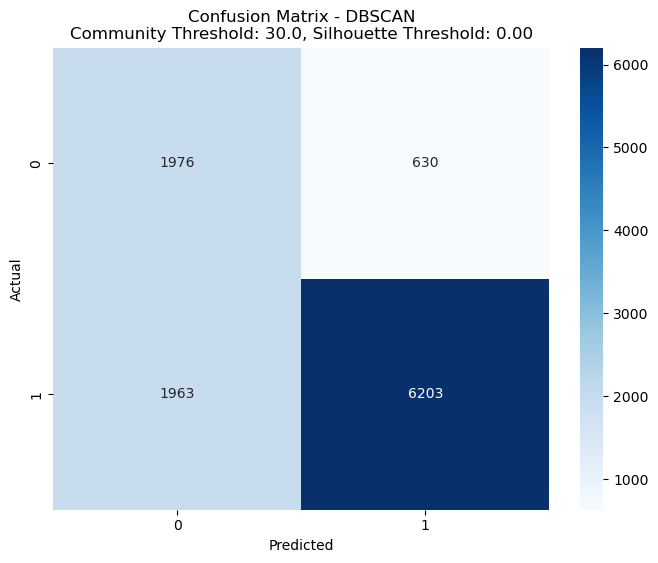

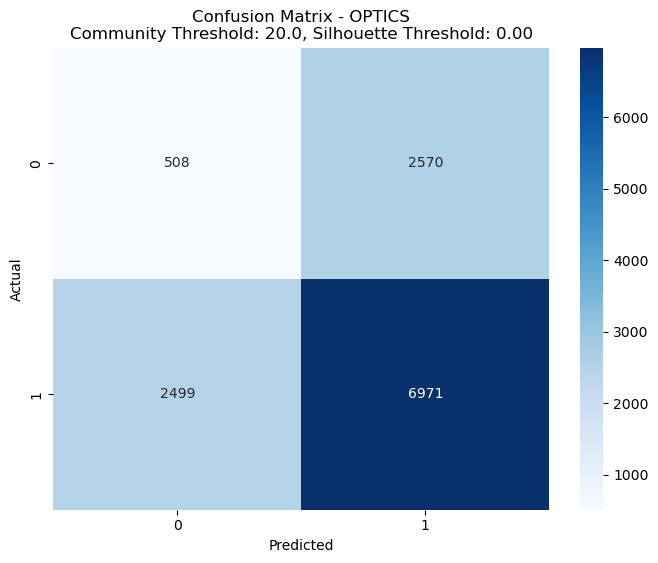

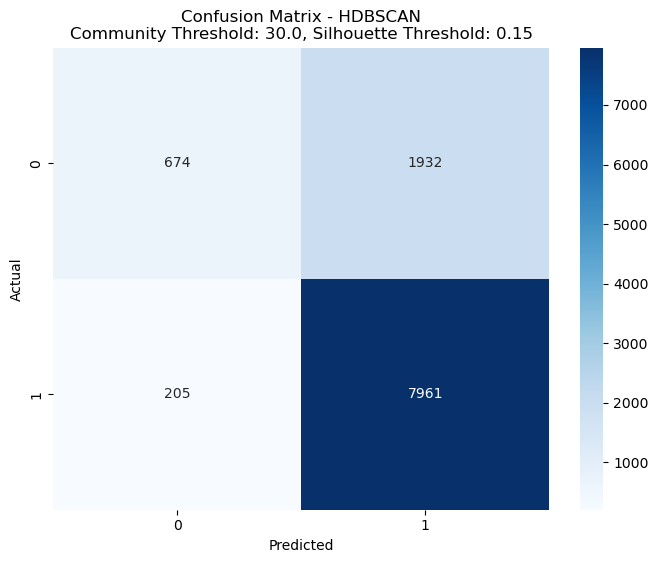


Best configuration for DBSCAN:
Community Threshold: 30.0
Silhouette Threshold: 0.00
Precision: 0.9078
Recall: 0.7596
F1 Score: 0.8271
False Positive Rate: 0.2417

Best configuration for OPTICS:
Community Threshold: 20.0
Silhouette Threshold: 0.00
Precision: 0.7306
Recall: 0.7361
F1 Score: 0.7334
False Positive Rate: 0.8350

Best configuration for HDBSCAN:
Community Threshold: 30.0
Silhouette Threshold: 0.15
Precision: 0.8047
Recall: 0.9749
F1 Score: 0.8817
False Positive Rate: 0.7414

Sensitivity analysis complete. Results and confusion matrices have been saved.


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, OPTICS
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/activation_features_incl_metadata_final.csv')

# Check if the columns exist
required_columns = ['activation_date', 'funding_address', 'activation_chain', 'totalTxs', 'totalVolume',
                    'XDAI_activity', 'Polygon_activity', 'OP_activity', 'ETH_activity', 'ARB_activity', 'community', 'Label']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in the dataset: {missing_columns}")

# Encode categorical features
label_encoders = {
    'activation_chain': LabelEncoder(),
    'funding_address': LabelEncoder()
}
df['activation_chain'] = label_encoders['activation_chain'].fit_transform(df['activation_chain'])
df['funding_address'] = label_encoders['funding_address'].fit_transform(df['funding_address'])

# Normalize the activation_date
df['activation_date'] = pd.to_datetime(df['activation_date']).astype(np.int64) // 10**9  # Convert to seconds since epoch

def perform_clustering(df, method, eps=0.5, min_samples=5, min_community_size=5):
    results = []
    for community in df['community'].unique():
        community_df = df[df['community'] == community].copy()
        if len(community_df) < min_community_size:
            continue
        X = StandardScaler().fit_transform(community_df[required_columns[:-2]])
        
        if method == 'DBSCAN':
            clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        elif method == 'OPTICS':
            clusterer = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
        elif method == 'HDBSCAN':
            clusterer = HDBSCAN(min_cluster_size=min_samples, min_samples=1)
        
        labels = clusterer.fit_predict(X)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        
        community_df['cluster'] = labels
        community_df['silhouette_score'] = silhouette
        results.append(community_df)
    
    return pd.concat(results)

def calculate_metrics(df, threshold):
    predicted = (df['silhouette_score'] > threshold).astype(int)
    actual = (df['Label'] == 'Sybil').astype(int)
    
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    precision = precision_score(actual, predicted, zero_division=0)
    recall = recall_score(actual, predicted, zero_division=0)
    f1 = f1_score(actual, predicted, zero_division=0)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    return {
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'FPR': fpr
    }

def perform_sensitivity_analysis(df, methods, community_thresholds, silhouette_thresholds):
    results = {}
    for comm_threshold in community_thresholds:
        for method in methods:
            result_df = perform_clustering(df, method, min_community_size=comm_threshold)
            for sil_threshold in silhouette_thresholds:
                metrics = calculate_metrics(result_df, sil_threshold)
                results[(method, comm_threshold, sil_threshold)] = {
                    'Community Threshold': comm_threshold,
                    'Silhouette Threshold': sil_threshold,
                    'Total Addresses': len(result_df),
                    'Sybil Addresses': sum(result_df['Label'] == 'Sybil'),
                    'Eligible Addresses': sum(result_df['Label'] == 'Eligible'),
                    **metrics
                }
    return pd.DataFrame(results).T

# Perform the sensitivity analysis
methods = ['DBSCAN', 'OPTICS', 'HDBSCAN']
community_thresholds = [5, 10, 15, 20, 25, 30]
silhouette_thresholds = np.arange(0, 0.55, 0.05)
sensitivity_results = perform_sensitivity_analysis(df, methods, community_thresholds, silhouette_thresholds)

# Save the results
sensitivity_results.to_csv('sensitivity_analysis_results_v2.csv')

# Plotting function for confusion matrix
def plot_confusion_matrix(method, comm_threshold, sil_threshold, metrics):
    # Ensure that the confusion matrix values are integers
    cm = np.array([[int(metrics['TN']), int(metrics['FP'])], 
                   [int(metrics['FN']), int(metrics['TP'])]])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'd' format is for integers
    plt.title(f'Confusion Matrix - {method}\nCommunity Threshold: {comm_threshold}, Silhouette Threshold: {sil_threshold:.2f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'confusion_matrix_{method}_{comm_threshold}_{sil_threshold:.2f}.png')
    plt.show()
    plt.close()

# Find best configuration for each method based on F1 score
best_configs = {}
for method in methods:
    method_results = sensitivity_results.loc[method]
    best_config = method_results.loc[method_results['F1 Score'].idxmax()]
    best_configs[method] = best_config

    # Plot confusion matrix for best configuration
    plot_confusion_matrix(method, best_config['Community Threshold'], best_config['Silhouette Threshold'], best_config)

# Print best configurations
for method, config in best_configs.items():
    print(f"\nBest configuration for {method}:")
    print(f"Community Threshold: {config['Community Threshold']}")
    print(f"Silhouette Threshold: {config['Silhouette Threshold']:.2f}")
    print(f"Precision: {config['Precision']:.4f}")
    print(f"Recall: {config['Recall']:.4f}")
    print(f"F1 Score: {config['F1 Score']:.4f}")
    print(f"False Positive Rate: {config['FPR']:.4f}")

print("\nSensitivity analysis complete. Results and confusion matrices have been saved.")

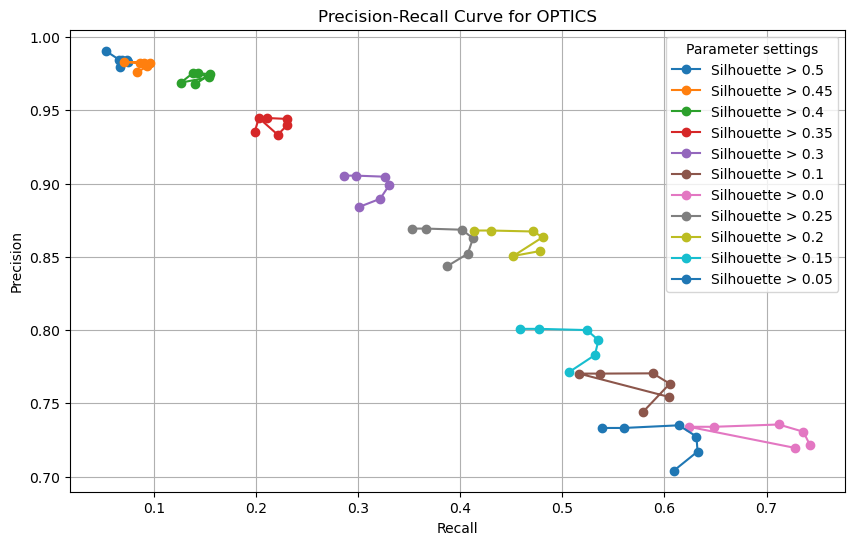

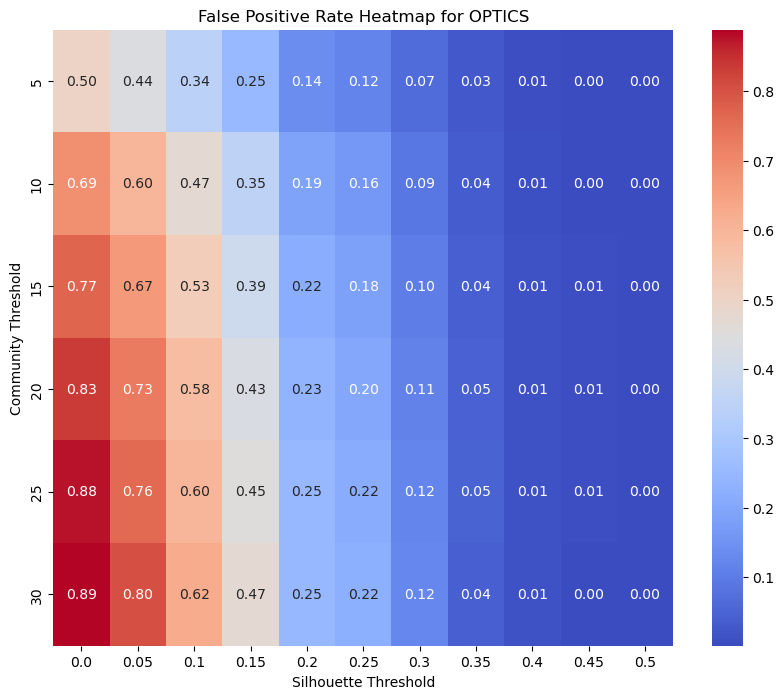

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

# Load your sensitivity analysis results
df = pd.read_csv('sensitivity_analysis_results_v2.csv')

# Filter for a specific method to simplify the example
optics_df = df[df['Method'] == 'OPTICS']

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
for threshold in optics_df['Silhouette Threshold'].unique():
    subset = optics_df[optics_df['Silhouette Threshold'] == threshold]
    plt.plot(subset['Recall'], subset['Precision'], marker='o', label=f'Silhouette > {threshold}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for OPTICS')
plt.legend(title='Parameter settings')
plt.grid(True)
plt.show()

# Plot Heatmap of FPR across settings
pivot_fpr = optics_df.pivot(index="Community Threshold", columns="Silhouette Threshold", values="FPR")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_fpr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('False Positive Rate Heatmap for OPTICS')
plt.xlabel('Silhouette Threshold')
plt.ylabel('Community Threshold')
plt.show()



--- DBSCAN Analysis ---


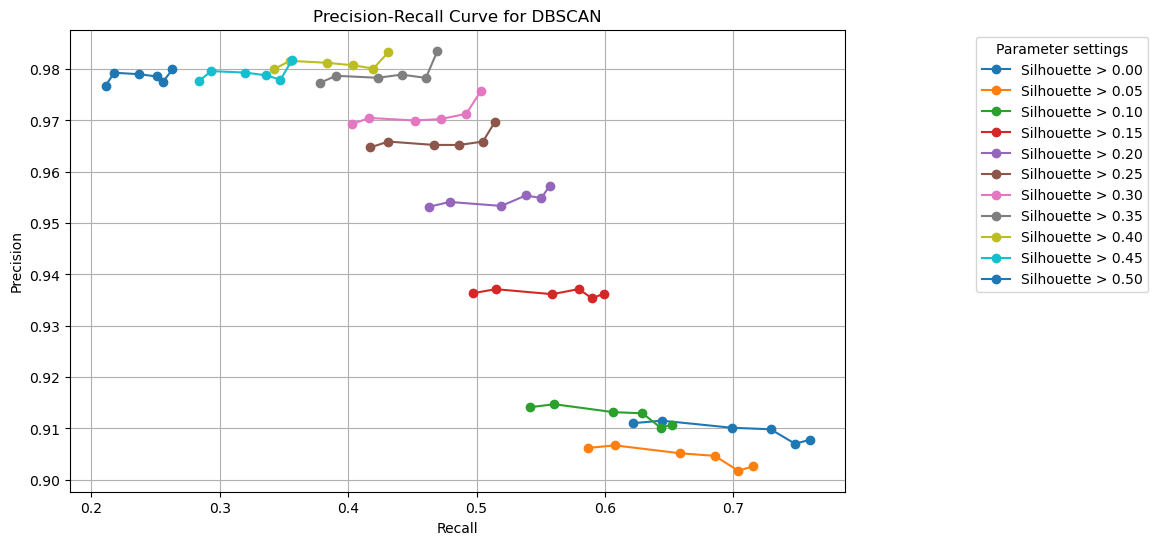

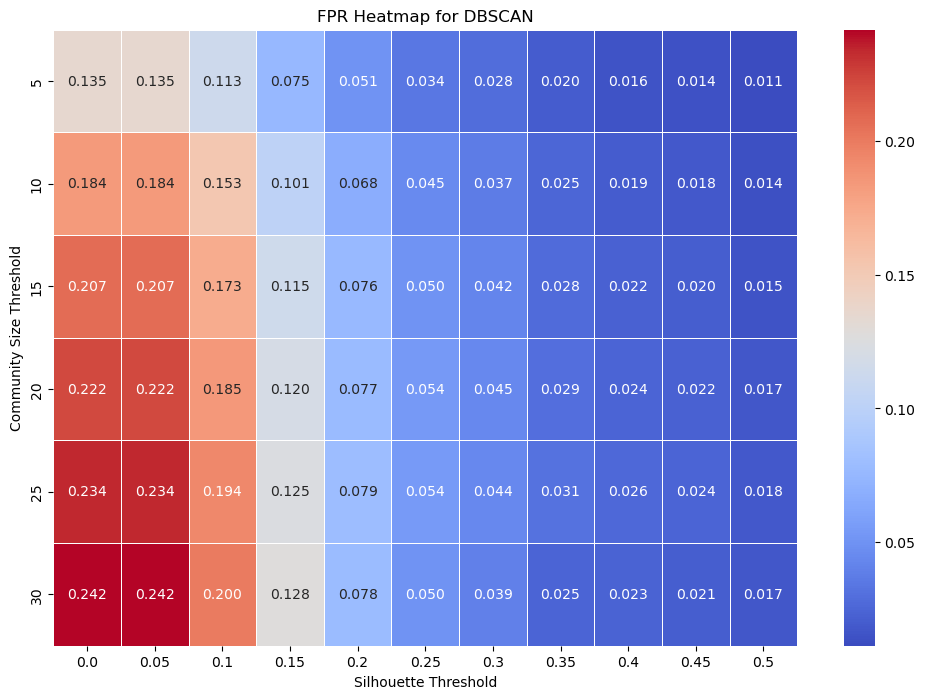


--- OPTICS Analysis ---


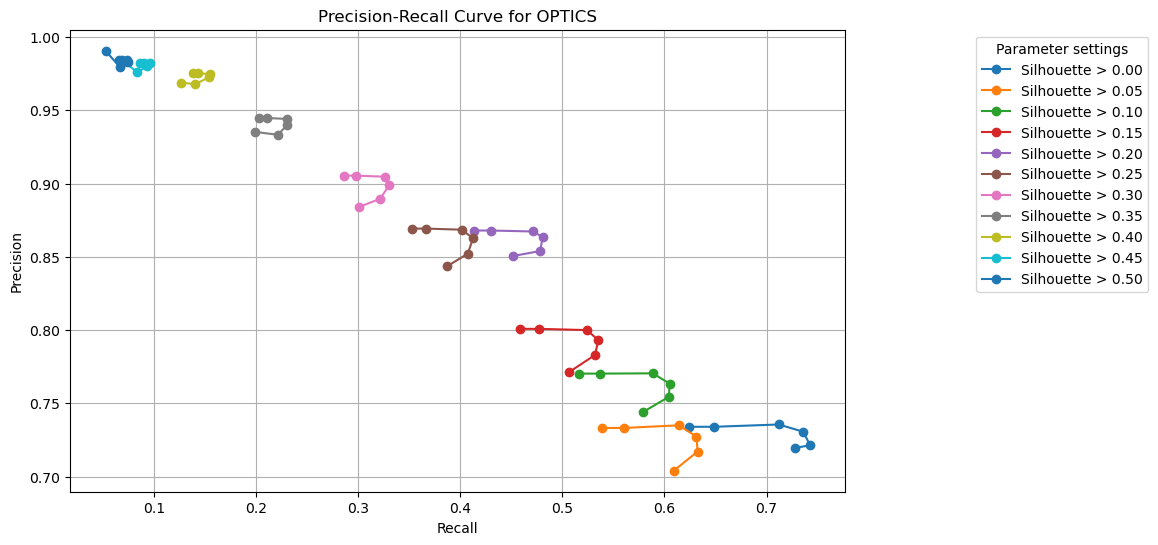

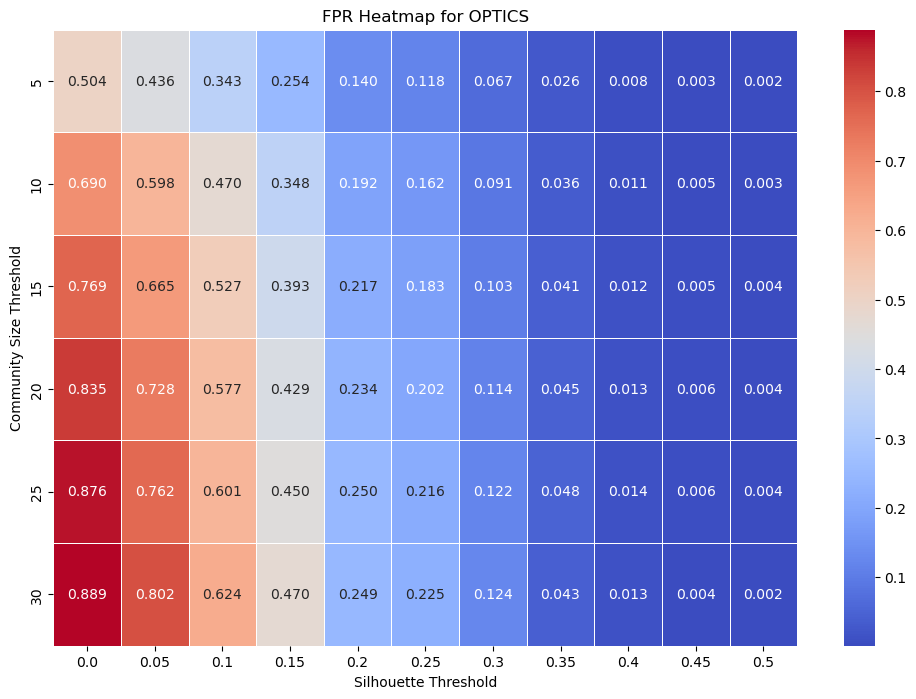


--- HDBSCAN Analysis ---


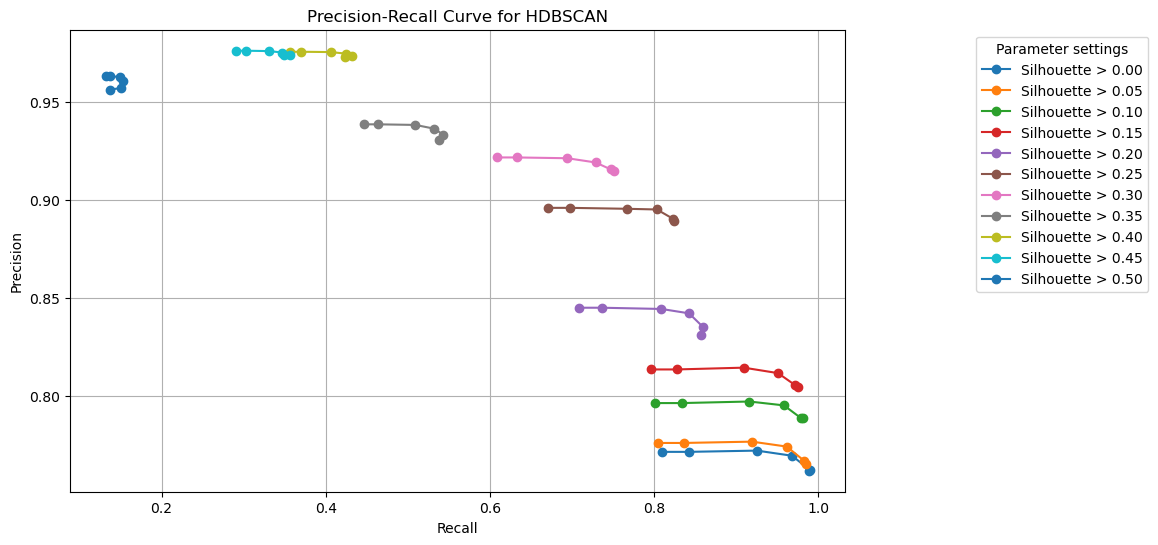

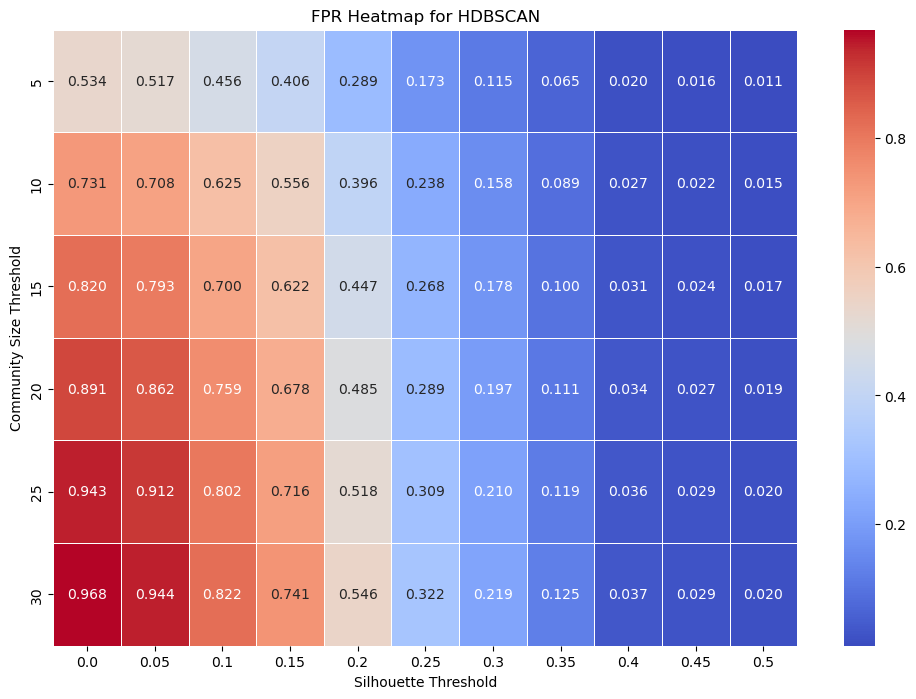

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(data, method):
    thresholds = sorted(data['Silhouette Threshold'].unique())
    plt.figure(figsize=(10, 6))
    for threshold in thresholds:
        subset = data[data['Silhouette Threshold'] == threshold]
        plt.plot(subset['Recall'], subset['Precision'], marker='o', label=f'Silhouette > {threshold:.2f}')
    
    plt.title(f'Precision-Recall Curve for {method}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(title='Parameter settings', loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.grid(True)
    plt.show()

def plot_fpr_heatmap(data, method):
    pivot = data.pivot(index='Community Size Threshold', columns='Silhouette Threshold', values='FPR')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
    plt.title(f'FPR Heatmap for {method}')
    plt.xlabel('Silhouette Threshold')
    plt.ylabel('Community Size Threshold')
    plt.show()

# Load the sensitivity analysis results
results_df = pd.read_csv('sensitivity_analysis_results_v2.csv')

# Split the data by method
methods = ['DBSCAN', 'OPTICS', 'HDBSCAN']
for method in methods:
    method_data = results_df[results_df['Method'] == method]
    
    # Plot the Precision-Recall Curve and FPR Heatmap
    print(f"\n--- {method} Analysis ---")
    plot_precision_recall_curve(method_data, method)
    plot_fpr_heatmap(method_data, method)

In [92]:
print(results_df.columns)
print(results_df.head())

Index(['Method', 'Community Size Threshold', 'Silhouette Threshold',
       'Total Addresses', 'Sybil Addresses', 'Eligible Addresses', 'TP', 'FP',
       'TN', 'FN', 'Precision', 'Recall', 'F1 Score', 'FPR'],
      dtype='object')
   Method  Community Size Threshold  Silhouette Threshold  Total Addresses  \
0  DBSCAN                         5                   0.0            17016   
1  DBSCAN                        10                   0.0            15140   
2  DBSCAN                        15                   0.0            13639   
3  DBSCAN                        20                   0.0            12548   
4  DBSCAN                        25                   0.0            11688   

   Sybil Addresses  Eligible Addresses    TP   FP    TN    FN  Precision  \
0            11744                5272  7301  713  4559  4443   0.911031   
1            11293                3847  7274  706  3141  4019   0.911529   
2            10233                3406  7151  706  2700  3082   0.91014

# Sensitivity analysis graphs


--- DBSCAN Analysis ---


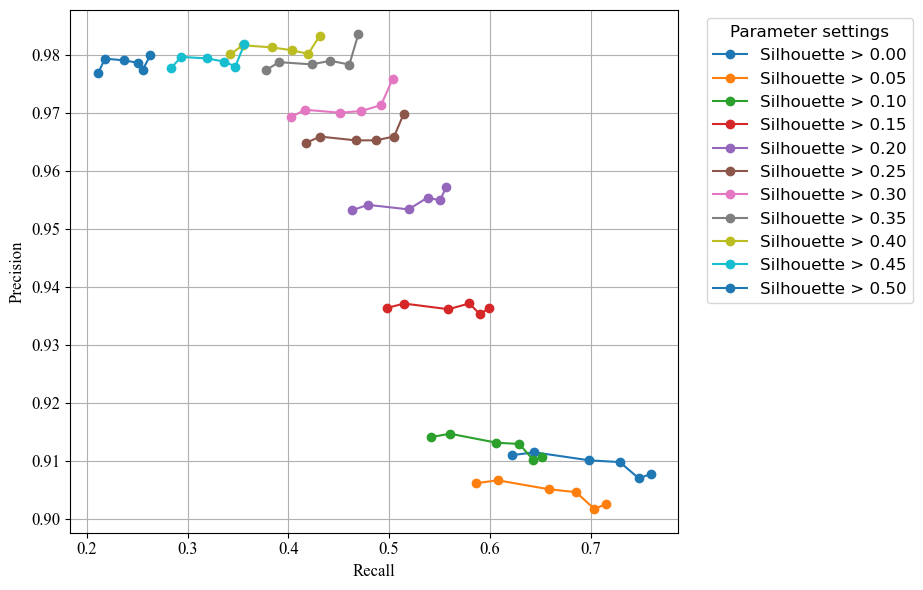

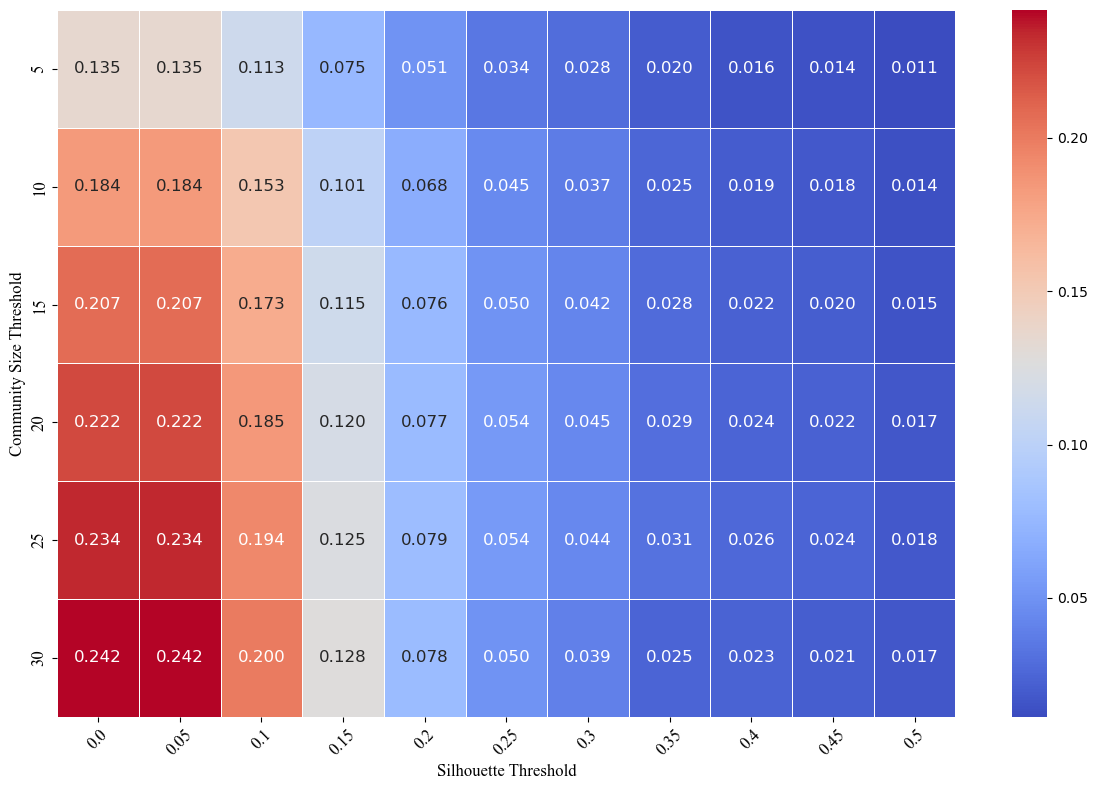


--- OPTICS Analysis ---


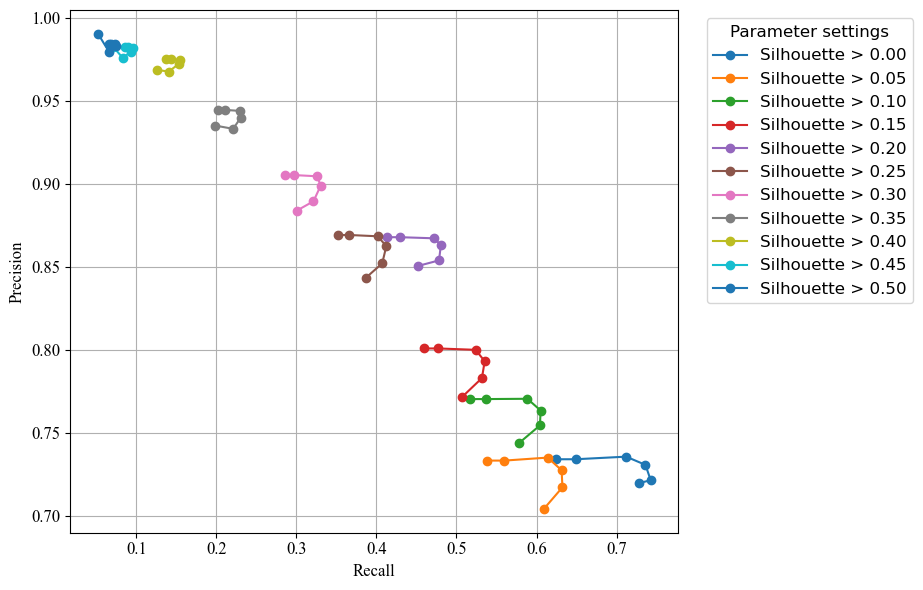

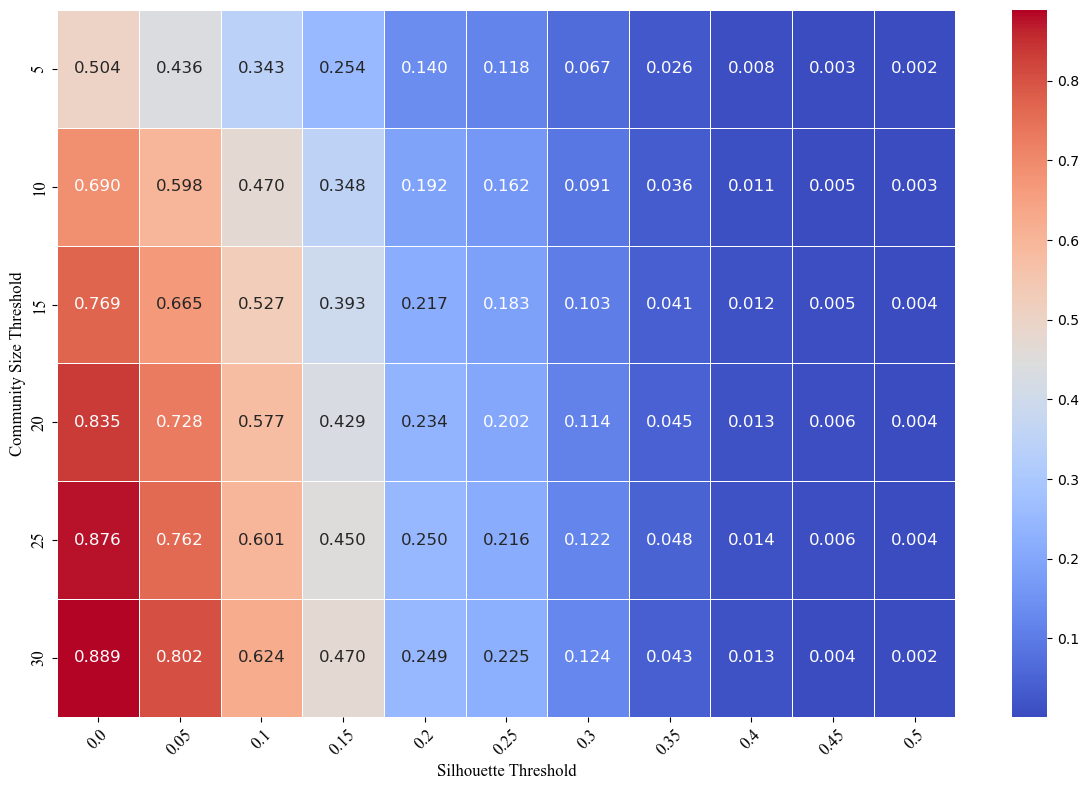


--- HDBSCAN Analysis ---


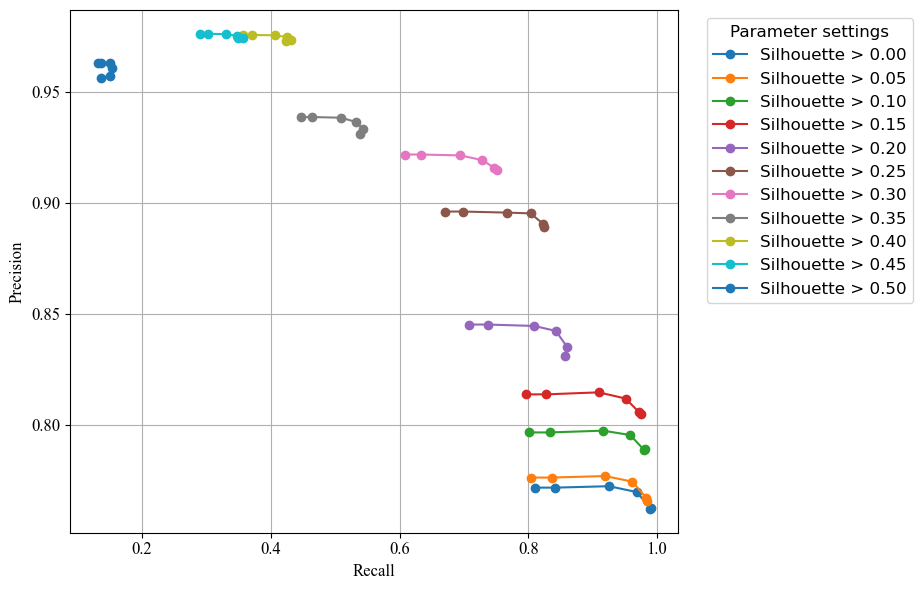

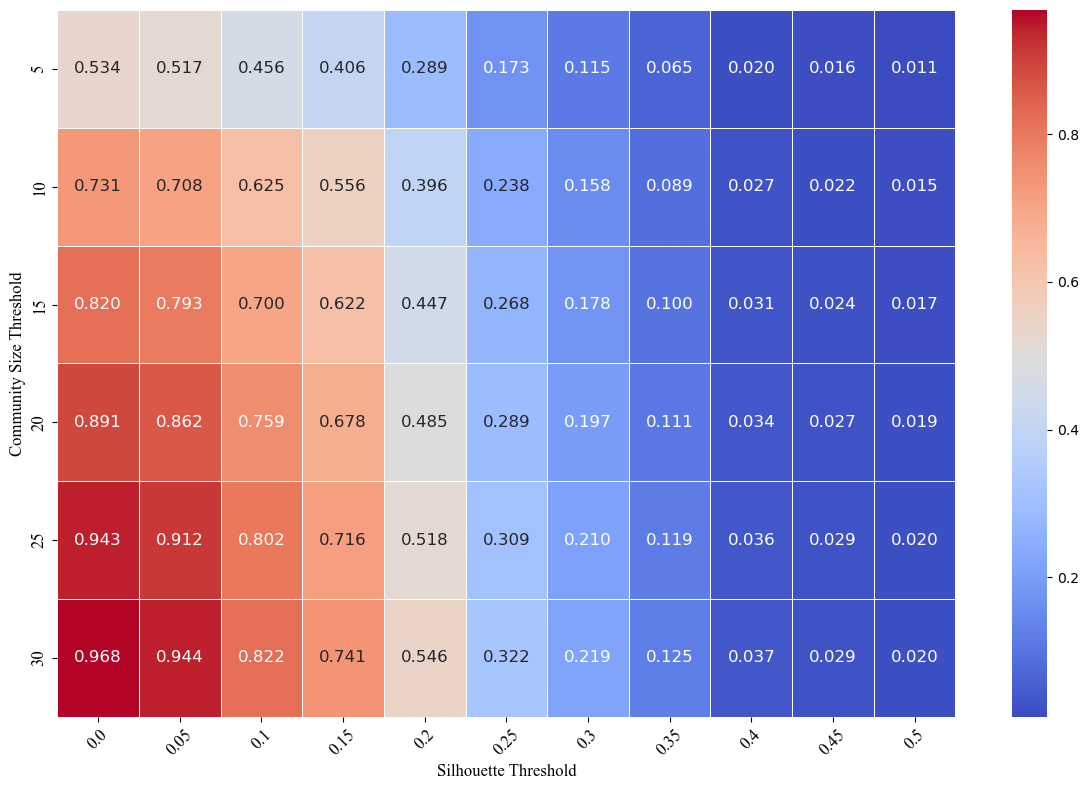

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(data, method):
    thresholds = sorted(data['Silhouette Threshold'].unique())
    plt.figure(figsize=(10, 6))
    for threshold in thresholds:
        subset = data[data['Silhouette Threshold'] == threshold]
        plt.plot(subset['Recall'], subset['Precision'], marker='o', label=f'Silhouette > {threshold:.2f}')
    
    plt.xlabel('Recall', fontsize=12, fontname='Times New Roman')
    plt.ylabel('Precision', fontsize=12, fontname='Times New Roman')
    plt.legend(title='Parameter settings', loc='upper right', bbox_to_anchor=(1.4, 1), fontsize=12, title_fontsize=12)
    plt.grid(True)
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')
    plt.tight_layout()
    plt.show()

def plot_fpr_heatmap(data, method):
    pivot = data.pivot(index='Community Size Threshold', columns='Silhouette Threshold', values='FPR')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, annot_kws={"fontsize": 12})
    plt.xlabel('Silhouette Threshold', fontsize=12, fontname='Times New Roman')
    plt.ylabel('Community Size Threshold', fontsize=12, fontname='Times New Roman')
    plt.xticks(fontsize=12, fontname='Times New Roman', rotation=45)
    plt.yticks(fontsize=12, fontname='Times New Roman')
    plt.tight_layout()
    plt.show()

# Load the sensitivity analysis results
results_df = pd.read_csv('sensitivity_analysis_results_v2.csv')

# Split the data by method
methods = ['DBSCAN', 'OPTICS', 'HDBSCAN']
for method in methods:
    method_data = results_df[results_df['Method'] == method]
    
    # Plot the Precision-Recall Curve and FPR Heatmap
    print(f"\n--- {method} Analysis ---")
    plot_precision_recall_curve(method_data, method)
    plot_fpr_heatmap(method_data, method)


--- DBSCAN Analysis ---


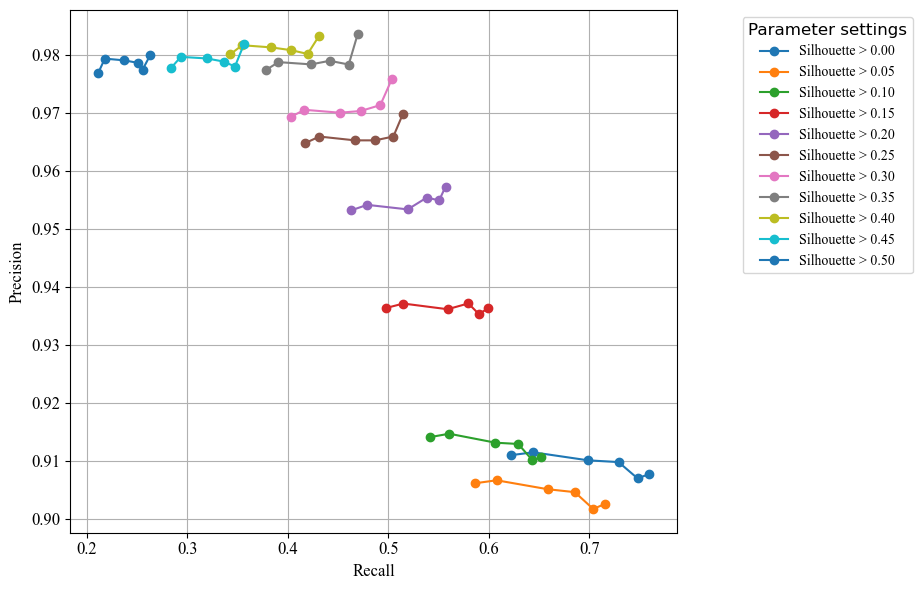

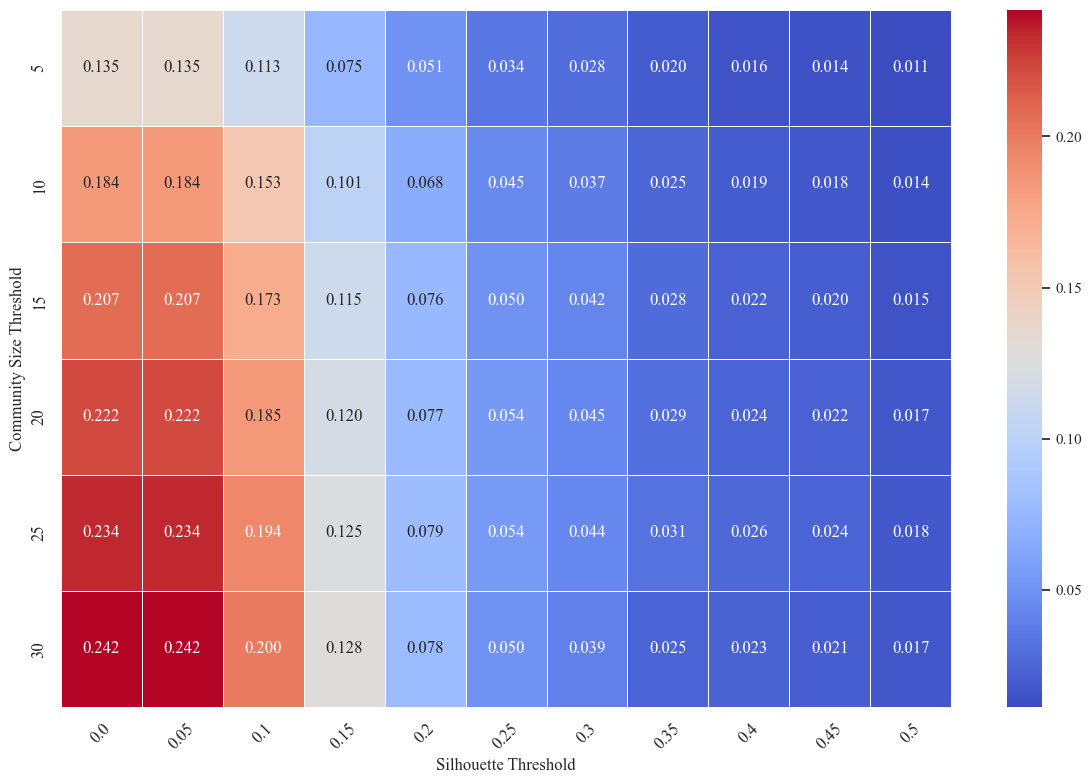


--- OPTICS Analysis ---


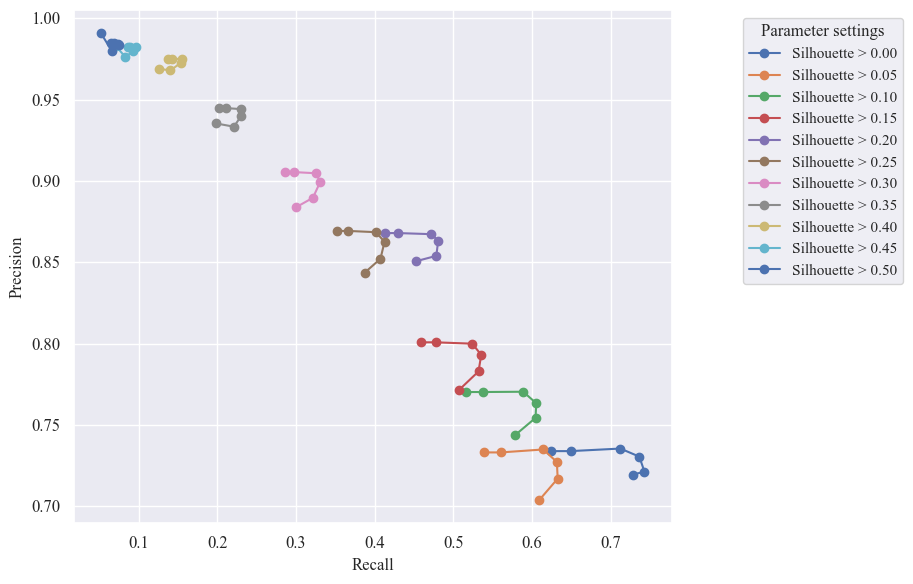

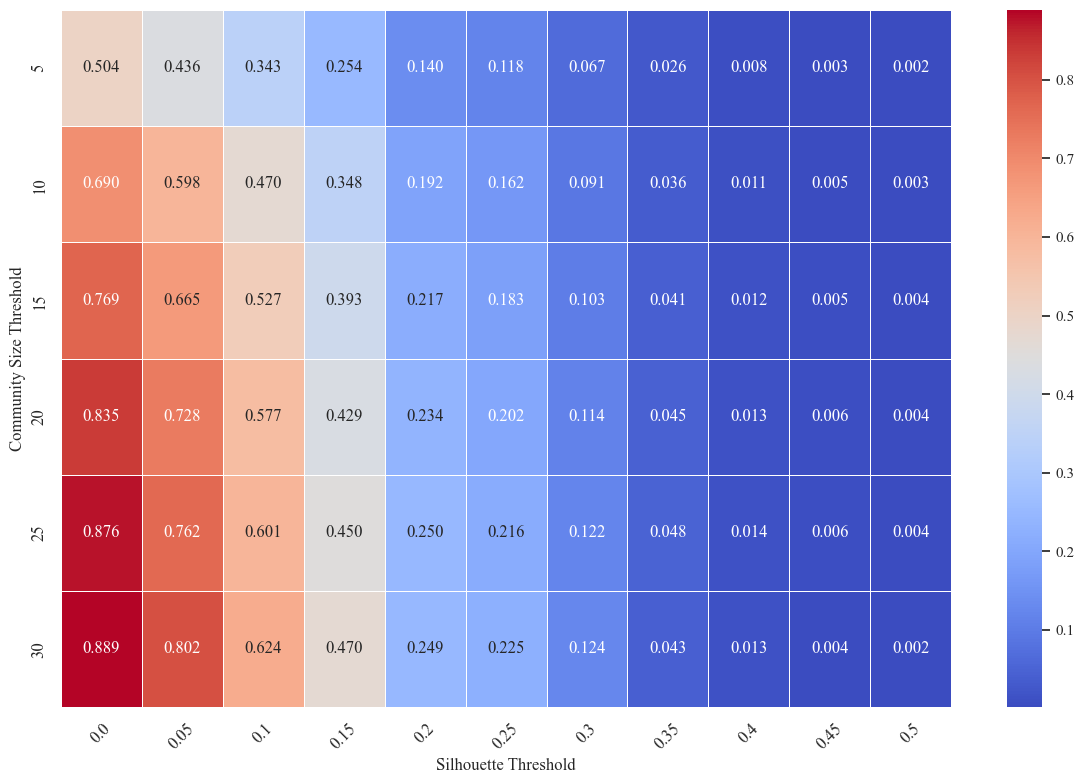


--- HDBSCAN Analysis ---


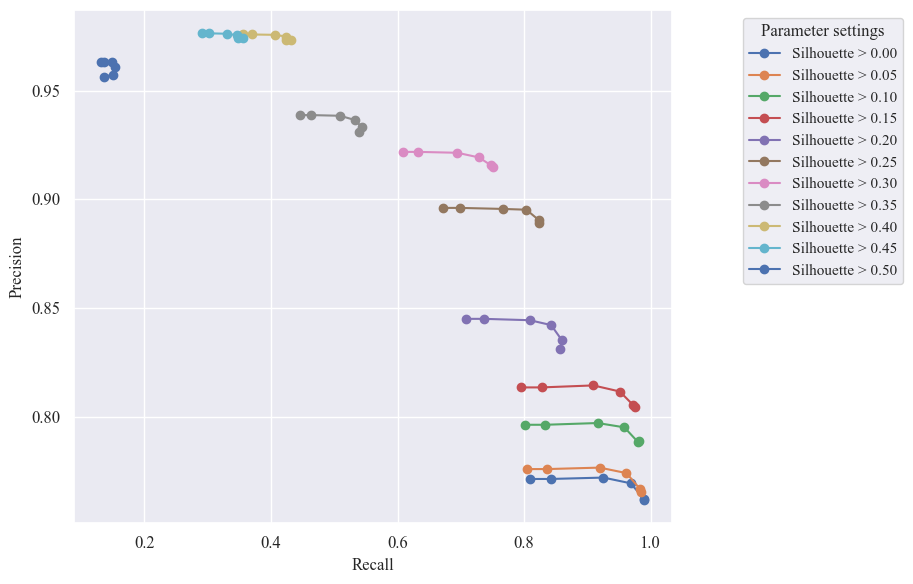

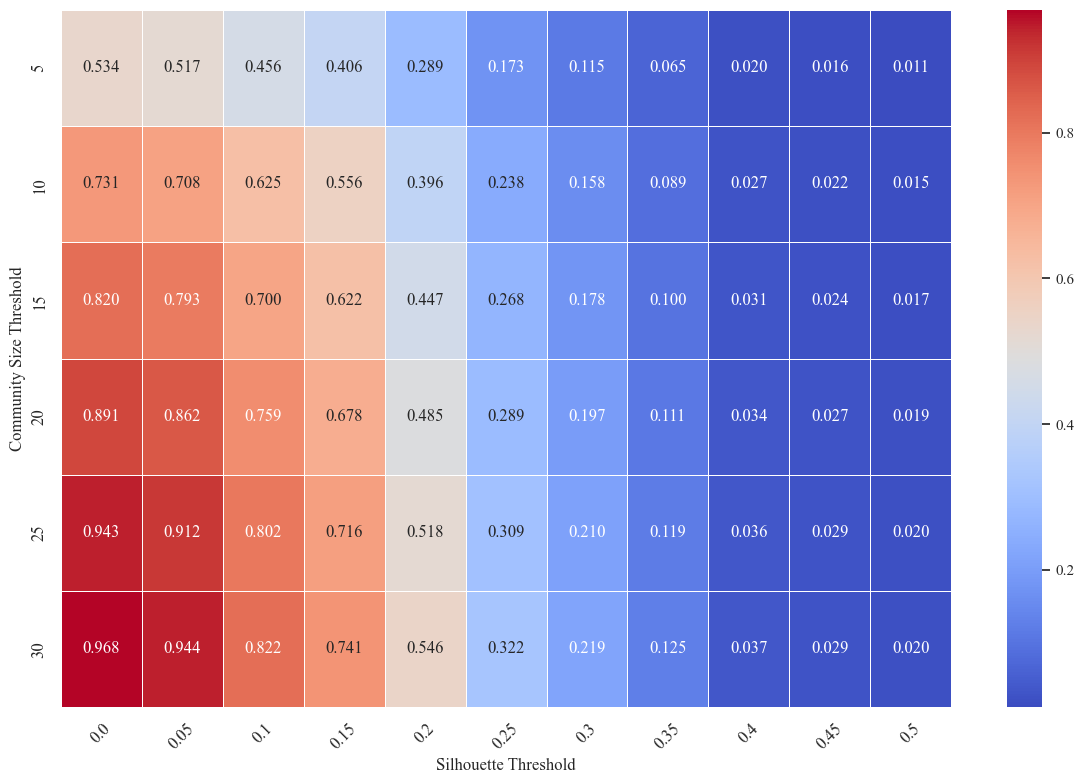

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall_curve(data, method):
    thresholds = sorted(data['Silhouette Threshold'].unique())
    plt.figure(figsize=(10, 6))
    for threshold in thresholds:
        subset = data[data['Silhouette Threshold'] == threshold]
        plt.plot(subset['Recall'], subset['Precision'], marker='o', label=f'Silhouette > {threshold:.2f}')
    
    plt.xlabel('Recall', fontsize=12, fontname='Times New Roman')
    plt.ylabel('Precision', fontsize=12, fontname='Times New Roman')
    plt.legend(title='Parameter settings', loc='upper right', bbox_to_anchor=(1.4, 1), fontsize=12, title_fontsize=12, prop={'family': 'Times New Roman'})
    plt.grid(True)
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')
    plt.tight_layout()
    plt.show()

def plot_fpr_heatmap(data, method):
    pivot = data.pivot(index='Community Size Threshold', columns='Silhouette Threshold', values='FPR')
    plt.figure(figsize=(12, 8))
    sns.set(font='Times New Roman')
    heatmap = sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, annot_kws={"fontsize": 12, "fontname": 'Times New Roman'})
    heatmap.set_xlabel('Silhouette Threshold', fontsize=12, fontname='Times New Roman')
    heatmap.set_ylabel('Community Size Threshold', fontsize=12, fontname='Times New Roman')
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, fontname='Times New Roman', rotation=45)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, fontname='Times New Roman')
    plt.tight_layout()
    plt.show()

# Load the sensitivity analysis results
results_df = pd.read_csv('sensitivity_analysis_results_v2.csv')

# Split the data by method
methods = ['DBSCAN', 'OPTICS', 'HDBSCAN']
for method in methods:
    method_data = results_df[results_df['Method'] == method]
    
    # Plot the Precision-Recall Curve and FPR Heatmap
    print(f"\n--- {method} Analysis ---")
    plot_precision_recall_curve(method_data, method)
    plot_fpr_heatmap(method_data, method)

Further graphs

                                  Metric        Value
0            Total number of communities  9610.000000
1                 Average community size    41.954527
2                  Median community size    11.000000
3                 Minimum community size     5.000000
4                 Maximum community size  6219.000000
5   Number of communities with size ≥ 20  2733.000000
6  Number of communities with size ≥ 100   587.000000


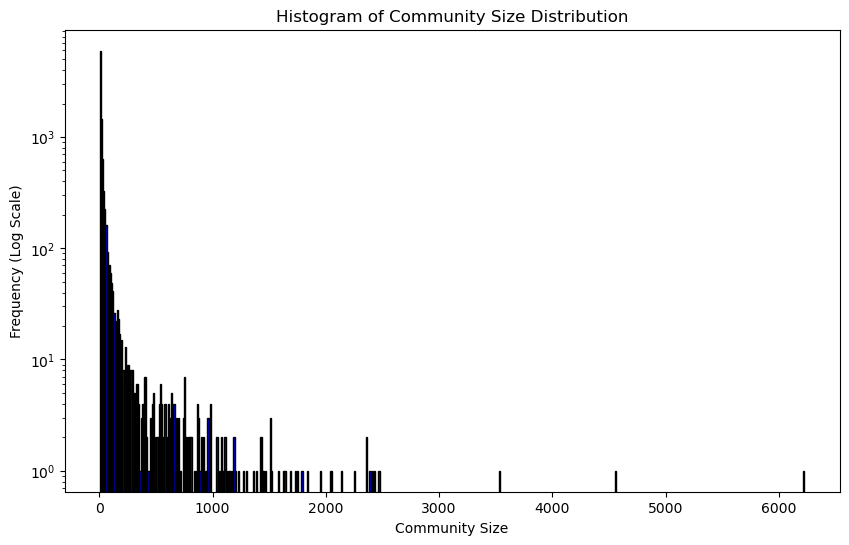

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
community_data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/sybilEligibleAddressesWithSize.csv'
community_stats = pd.read_csv(community_data_path)

# Filter to retain only communities of size 5 and larger
filtered_community_stats = community_stats[community_stats['size'] >= 5]

# Calculate required statistics for Table 1
total_communities = len(filtered_community_stats)
average_size = filtered_community_stats['size'].mean()
median_size = filtered_community_stats['size'].median()
min_size = filtered_community_stats['size'].min()
max_size = filtered_community_stats['size'].max()
communities_over_20 = (filtered_community_stats['size'] >= 20).sum()
communities_over_100 = (filtered_community_stats['size'] >= 100).sum()

# Create Table 1 DataFrame
table1_data = {
    'Metric': [
        'Total number of communities',
        'Average community size',
        'Median community size',
        'Minimum community size',
        'Maximum community size',
        'Number of communities with size ≥ 20',
        'Number of communities with size ≥ 100'
    ],
    'Value': [
        total_communities,
        average_size,
        median_size,
        min_size,
        max_size,
        communities_over_20,
        communities_over_100
    ]
}
table1 = pd.DataFrame(table1_data)
print(table1)

# Plotting the histogram for community sizes
plt.figure(figsize=(10, 6))
plt.hist(filtered_community_stats['size'], bins=range(int(min_size), int(max_size) + 10, 10), color='blue', edgecolor='black')
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Community Size')
plt.ylabel('Frequency (Log Scale)')  # Update y label
plt.title('Histogram of Community Size Distribution')
plt.show()


                                  Metric        Value
0            Total number of communities  9610.000000
1                 Average community size   333.979273
2                  Median community size    64.000000
3                 Minimum community size     5.000000
4                 Maximum community size  6219.000000
5   Number of communities with size ≥ 20  2733.000000
6  Number of communities with size ≥ 100   587.000000


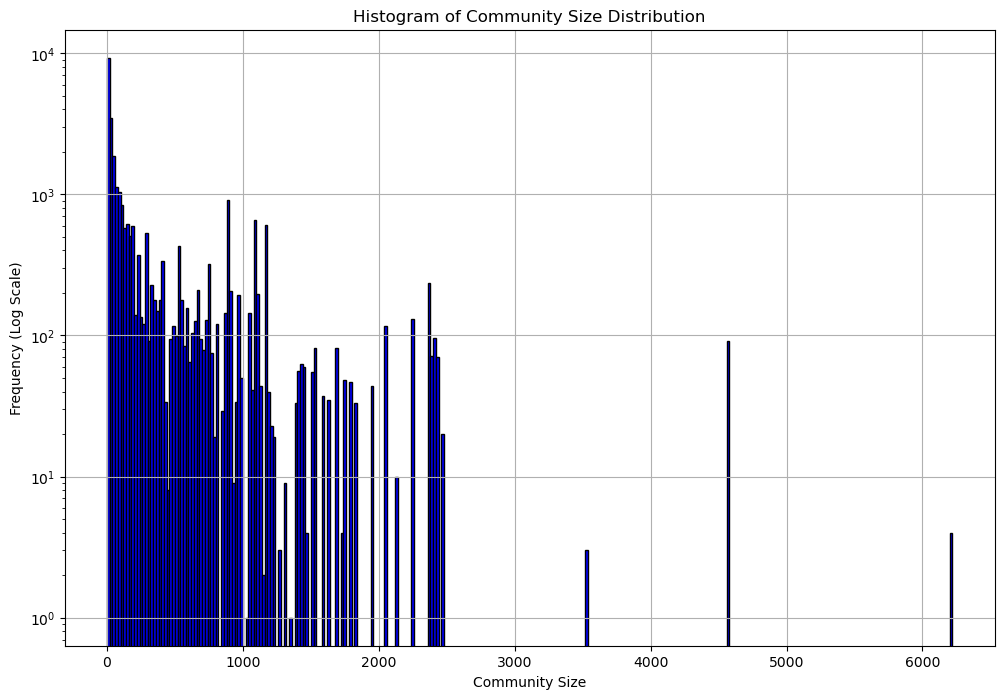

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
community_data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityAndSize.csv'
community_stats = pd.read_csv(community_data_path)

# Filter to retain only communities of size 5 and larger
filtered_community_stats = community_stats[community_stats['size'] >= 5]

# Calculate required statistics for Table 1
total_communities = filtered_community_stats['community'].nunique()  # Count unique community IDs
average_size = filtered_community_stats['size'].mean()
median_size = filtered_community_stats['size'].median()
min_size = filtered_community_stats['size'].min()
max_size = filtered_community_stats['size'].max()
communities_over_20 = filtered_community_stats[filtered_community_stats['size'] >= 20]['community'].nunique()
communities_over_100 = filtered_community_stats[filtered_community_stats['size'] >= 100]['community'].nunique()

# Create Table 1 DataFrame
table1_data = {
    'Metric': [
        'Total number of communities',
        'Average community size',
        'Median community size',
        'Minimum community size',
        'Maximum community size',
        'Number of communities with size ≥ 20',
        'Number of communities with size ≥ 100'
    ],
    'Value': [
        total_communities,
        average_size,
        median_size,
        min_size,
        max_size,
        communities_over_20,
        communities_over_100
    ]
}
table1 = pd.DataFrame(table1_data)
print(table1)

# Assuming 'filtered_community_stats' is already loaded and filtered correctly
plt.figure(figsize=(12, 8))
# Customizing the bin size and range for better visibility
bin_size = 20  # Smaller bins to have a more granular view of the distribution
max_size = filtered_community_stats['size'].max()
bins = range(0, max_size + bin_size, bin_size)

plt.hist(filtered_community_stats['size'], bins=bins, color='blue', edgecolor='black')
plt.yscale('log')  # Keeping y-axis on log scale to manage wide range of values
plt.xlabel('Community Size')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Community Size Distribution')
plt.grid(True)
plt.show()


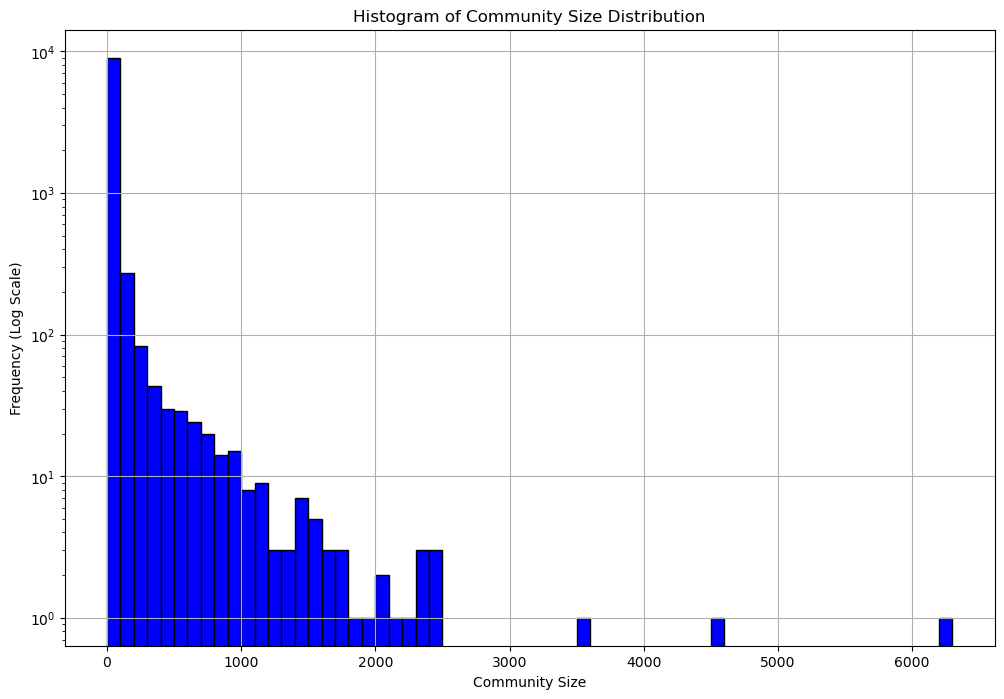

Number of communities in the histogram: 9610
Summary Statistics for Community Sizes:
count    29864.000000
mean       333.979273
std        561.543373
min          5.000000
25%         14.000000
50%         64.000000
75%        415.000000
max       6219.000000
Name: size, dtype: float64


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
community_data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityAndSize.csv'
community_stats = pd.read_csv(community_data_path)

# Filter to retain only communities of size 5 and larger
filtered_community_stats = community_stats[community_stats['size'] >= 5]

# Ensuring each community is considered only once for the histogram
unique_communities = filtered_community_stats.drop_duplicates(subset='community')

# Setting up the bins with equal width
max_size = unique_communities['size'].max()
bin_width = 100  # You can adjust the bin width here depending on the distribution density
bins = range(0, max_size + bin_width, bin_width)

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(unique_communities['size'], bins=bins, color='blue', edgecolor='black')
plt.yscale('log')  # Keeping y-axis on log scale to manage wide range of values
plt.xlabel('Community Size')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Community Size Distribution')
plt.grid(True)
plt.show()

# Print number of communities in the histogram
print(f"Number of communities in the histogram: {len(unique_communities)}")

# Print summary statistics
print(f"Summary Statistics for Community Sizes:")
print(filtered_community_stats['size'].describe())



In [71]:
import pandas as pd

# Load the data
community_data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityAndSize.csv'
community_stats = pd.read_csv(community_data_path)

# Assuming 'size' is the column that indicates the size of each community
# Filter out communities with size less than 5
filtered_communities = community_stats[community_stats['size'] >= 5]

# Calculate the total number of communities
total_communities = len(filtered_communities)

# Calculate the percentages of community sizes within specified ranges
less_than_10 = (filtered_communities['size'] < 10).sum() / total_communities * 100
between_10_and_100 = ((filtered_communities['size'] >= 10) & (filtered_communities['size'] <= 100)).sum() / total_communities * 100
more_than_100 = (filtered_communities['size'] > 100).sum() / total_communities * 100

# Find the size of the largest community
max_size = filtered_communities['size'].max()

print(f"Percentage of communities with fewer than 10 addresses: {less_than_10:.2f}%")
print(f"Percentage of communities with between 10 and 100 addresses: {between_10_and_100:.2f}%")
print(f"Percentage of communities with more than 100 addresses: {more_than_100:.2f}%")
print(f"Size of the largest community: {max_size}")


Percentage of communities with fewer than 10 addresses: 16.68%
Percentage of communities with between 10 and 100 addresses: 39.64%
Percentage of communities with more than 100 addresses: 43.67%
Size of the largest community: 6219


ALternative way for histogram

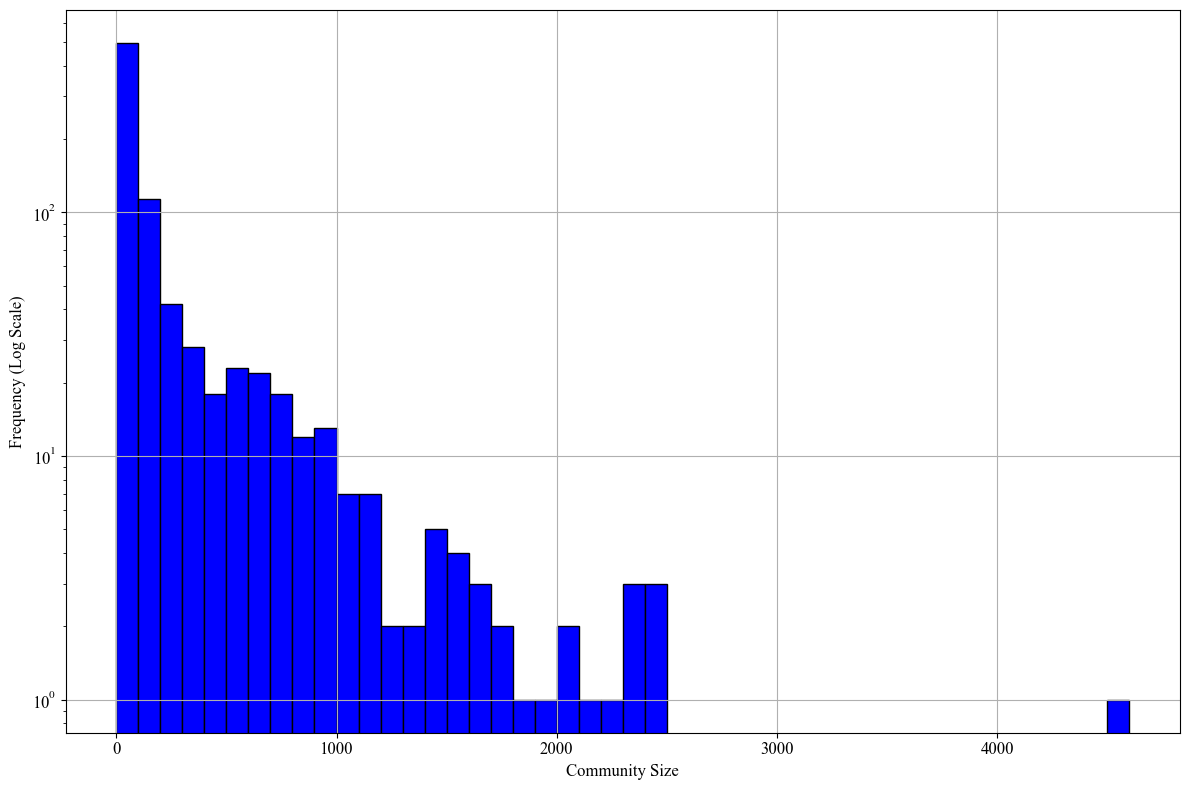

Number of communities in the histogram: 830
Summary Statistics for Community Sizes:
count    17915.000000
mean       536.234775
std        639.199256
min          5.000000
25%         80.000000
50%        287.000000
75%        881.000000
max       4561.000000
Name: size, dtype: float64


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
community_data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityAndSize.csv'
community_stats = pd.read_csv(community_data_path)

# Count the number of addresses in each community
community_counts = community_stats['community'].value_counts()

# Filter to retain only communities with at least 5 addresses in the DataFrame
filtered_community_stats = community_stats[community_stats['community'].isin(community_counts[community_counts >= 5].index)]

# Ensuring each community is considered only once for the histogram
unique_communities = filtered_community_stats.drop_duplicates(subset='community')

# Setting up the bins with equal width
max_size = unique_communities['size'].max()
bin_width = 100  # You can adjust the bin width here depending on the distribution density
bins = range(0, max_size + bin_width, bin_width)

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(unique_communities['size'], bins=bins, color='blue', edgecolor='black')
plt.yscale('log')  # Keeping y-axis on log scale to manage wide range of values
plt.xlabel('Community Size', fontsize=12, fontname='Times New Roman')
plt.ylabel('Frequency (Log Scale)', fontsize=12, fontname='Times New Roman')
plt.grid(True)
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.tight_layout()
plt.show()

# Print number of communities in the histogram
print(f"Number of communities in the histogram: {len(unique_communities)}")

# Print summary statistics
print(f"Summary Statistics for Community Sizes:")
print(filtered_community_stats['size'].describe())

Further analysis

In [85]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'size' is the column with community sizes
df = pd.DataFrame({'size': [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 4561]})  # Example data

bins = [0, 10, 100, 1000, np.inf]
labels = ['5-10', '11-100', '101-1000', '1000+']

df['size_category'] = pd.cut(df['size'], bins=bins, labels=labels, include_lowest=True)

size_distribution = df['size_category'].value_counts(normalize=True).sort_index()
print(size_distribution)

size_category
5-10        0.2
11-100      0.3
101-1000    0.3
1000+       0.2
Name: proportion, dtype: float64


In [55]:


import pandas as pd

# Load the data
data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityMetadata.csv'  # Adjust this to the path of your dataset
data = pd.read_csv(data_path)

# Total number of addresses
total_addresses = len(data)

# Addresses grouped into communities
grouped_data = data[data['community'] != -1]  # Assuming -1 or similar marks ungrouped addresses
grouped_addresses = len(grouped_data)
distinct_communities = grouped_data['community'].nunique()

# Addresses not grouped into communities (assuming community ID for ungrouped is set to -1 or similar)
ungrouped_addresses = data[data['community'] == -1]

# Printing the results
print(f"Total number of addresses: {total_addresses}")
print(f"Number of addresses grouped into communities: {grouped_addresses}")
print(f"Number of distinct communities: {distinct_communities}")
print(f"Number of ungrouped addresses: {len(ungrouped_addresses)}")


Total number of addresses: 43052
Number of addresses grouped into communities: 43052
Number of distinct communities: 14604
Number of ungrouped addresses: 0


In [73]:
import pandas as pd

# Load the data
data_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/mergedWithCommunityMetadata.csv'  # Adjust this to the path of your dataset
data = pd.read_csv(data_path)

# Total number of addresses
total_addresses = len(data)

# Addresses grouped into communities
grouped_data = data[data['community'] != 'no community']
community_sizes = grouped_data.groupby('community').size()

# Filter communities by size ≥ 5
valid_communities = community_sizes[community_sizes >= 5]

# Number of distinct communities with size ≥ 5
distinct_communities = len(valid_communities)

# Number of addresses in valid communities
grouped_addresses = valid_communities.sum()

# Addresses not grouped into communities
ungrouped_addresses = data[data['community'] == 'no community']

# Printing the results
print(f"Total number of addresses: {total_addresses}")
print(f"Number of addresses grouped into valid communities (size ≥ 5): {grouped_addresses}")
print(f"Number of distinct communities of size ≥ 5: {distinct_communities}")
print(f"Number of ungrouped addresses: {len(ungrouped_addresses)}")


Total number of addresses: 43052
Number of addresses grouped into valid communities (size ≥ 5): 17915
Number of distinct communities of size ≥ 5: 830
Number of ungrouped addresses: 7902


In [58]:
# Python script to count the number of lines in a file
file_path = 'C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/preliminaryAddresses.ts'

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        print(f"Total number of observations (lines) in the file: {len(lines)}")
except FileNotFoundError:
    print("File not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


Total number of observations (lines) in the file: 43056


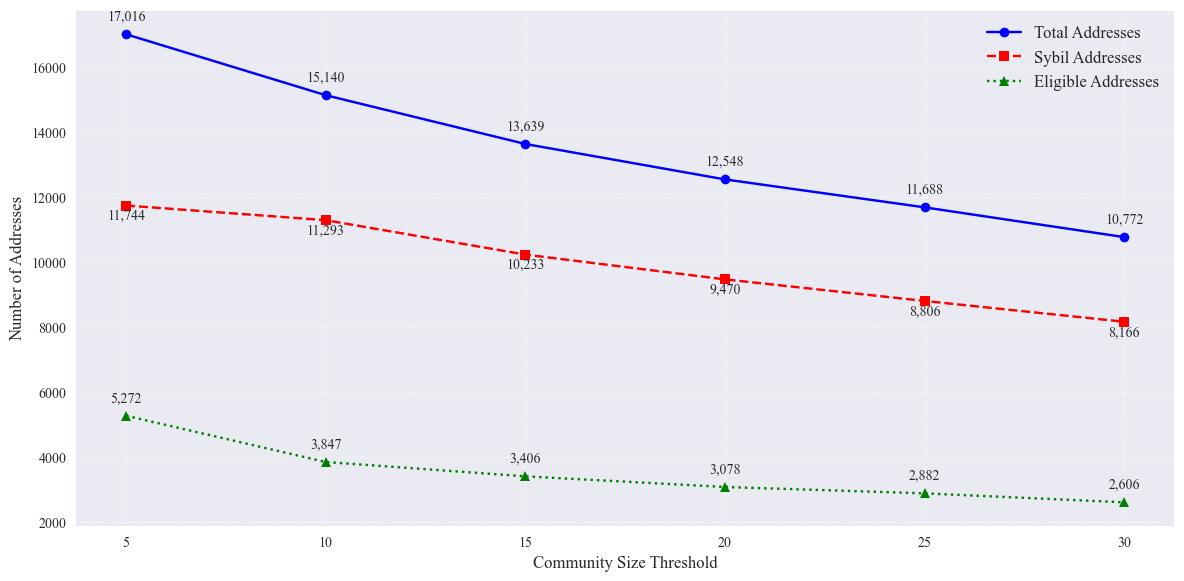

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/sensitivity_analysis_results_v2.csv')

# Filter for DBSCAN method and Silhouette Threshold of 0
df_filtered = df[(df['Method'] == 'DBSCAN') & (df['Silhouette Threshold'] == 0)]

# Sort the DataFrame by Community Size Threshold
df_filtered = df_filtered.sort_values('Community Size Threshold')

# Set global font properties
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot Total Addresses
plt.plot(df_filtered['Community Size Threshold'], df_filtered['Total Addresses'], 
         marker='o', linestyle='-', color='blue', label='Total Addresses')

# Plot Sybil Addresses
plt.plot(df_filtered['Community Size Threshold'], df_filtered['Sybil Addresses'], 
         marker='s', linestyle='--', color='red', label='Sybil Addresses')

# Plot Eligible Addresses
plt.plot(df_filtered['Community Size Threshold'], df_filtered['Eligible Addresses'], 
         marker='^', linestyle=':', color='green', label='Eligible Addresses')

# Customize the plot
# Remove the title
# plt.title('Impact of Community Size Threshold on Address Counts', fontsize=16)
plt.xlabel('Community Size Threshold', fontsize=12)
plt.ylabel('Number of Addresses', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

# Add value labels
for x, y in zip(df_filtered['Community Size Threshold'], df_filtered['Total Addresses']):
    plt.annotate(f'{y:,}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

for x, y in zip(df_filtered['Community Size Threshold'], df_filtered['Sybil Addresses']):
    plt.annotate(f'{y:,}', (x, y), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=10)

for x, y in zip(df_filtered['Community Size Threshold'], df_filtered['Eligible Addresses']):
    plt.annotate(f'{y:,}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Improve the layout
plt.tight_layout()

# Save the plot
plt.savefig('community_size_threshold_impact_v2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


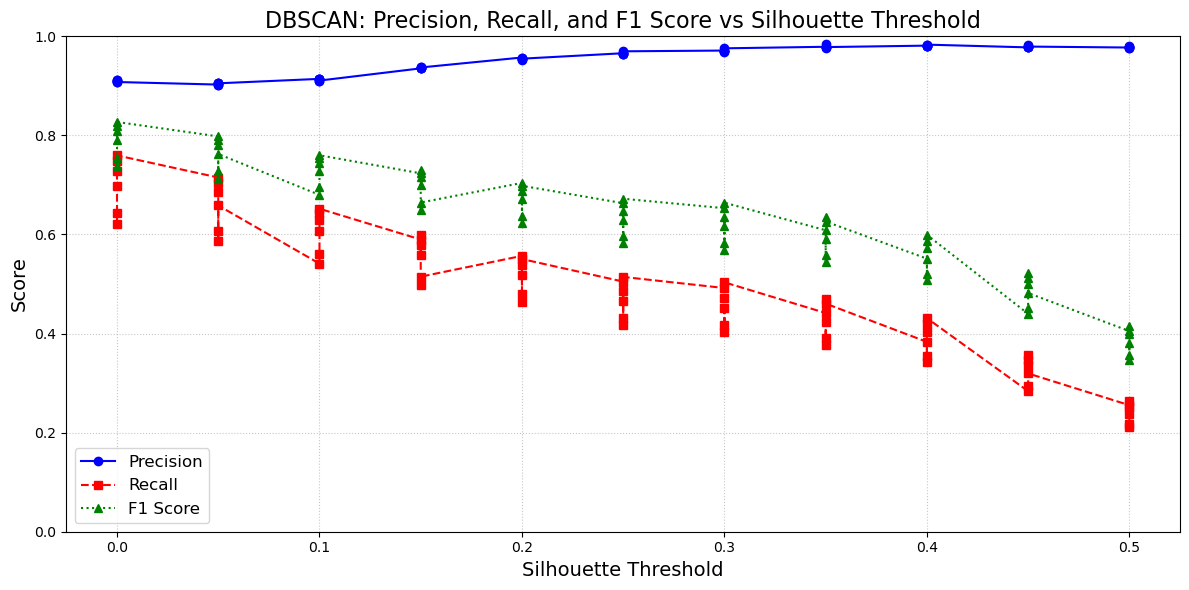

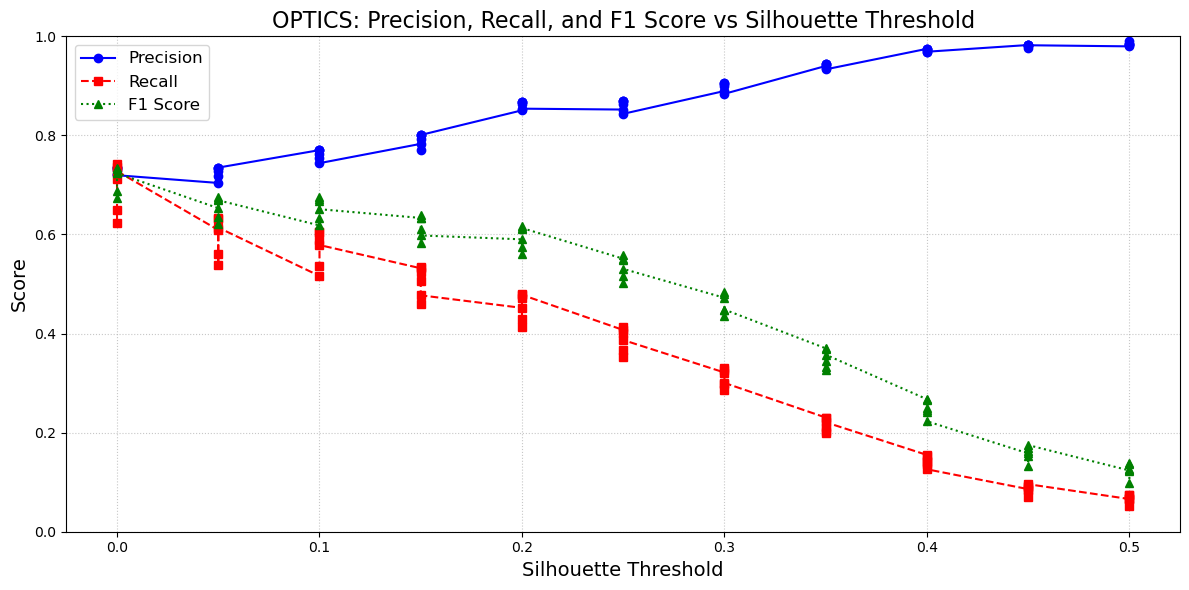

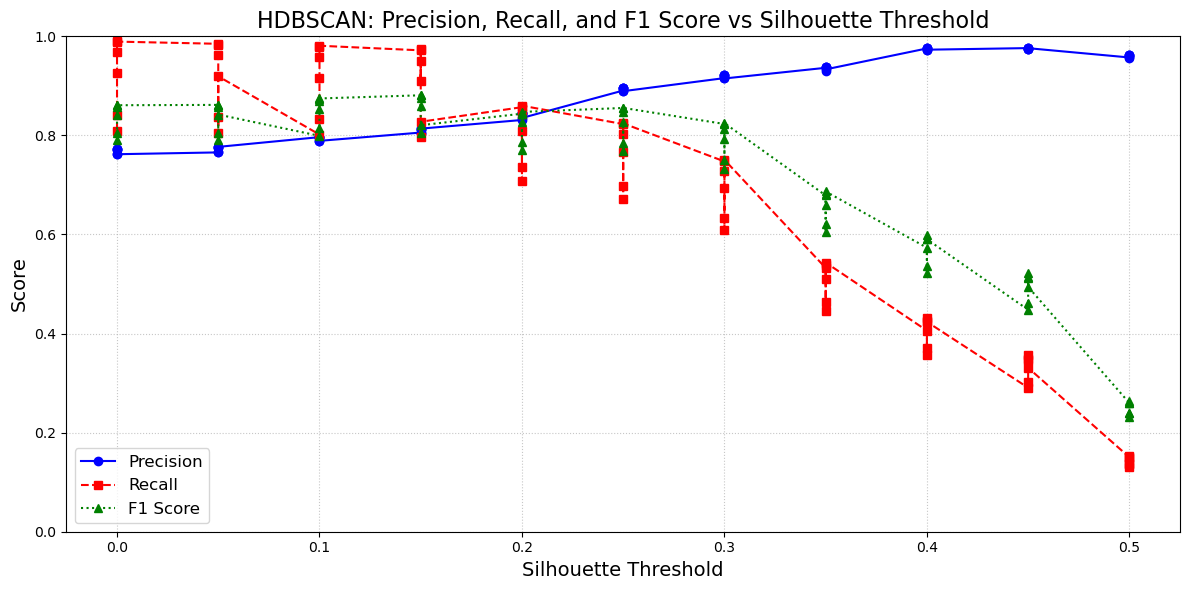

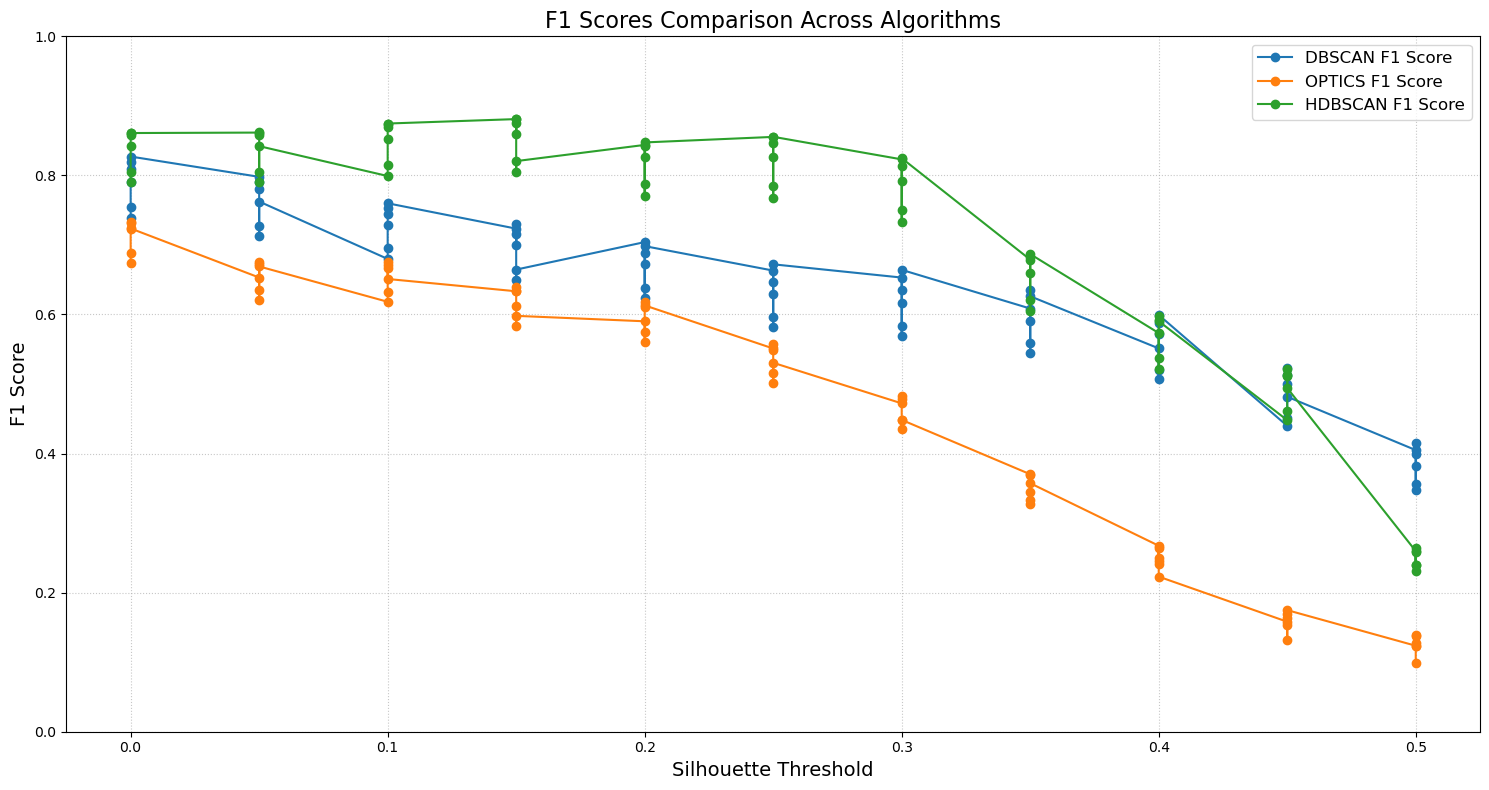

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/sensitivity_analysis_results_v2.csv')

# List of algorithms
algorithms = ['DBSCAN', 'OPTICS', 'HDBSCAN']

# Function to create plot for each algorithm
def plot_metrics(algorithm):
    # Filter data for the specific algorithm and sort by Silhouette Threshold
    df_alg = df[df['Method'] == algorithm].sort_values('Silhouette Threshold')
    
    # Create the line plot
    plt.figure(figsize=(12, 6))
    
    # Plot Precision
    plt.plot(df_alg['Silhouette Threshold'], df_alg['Precision'], 
             marker='o', linestyle='-', color='blue', label='Precision')
    
    # Plot Recall
    plt.plot(df_alg['Silhouette Threshold'], df_alg['Recall'], 
             marker='s', linestyle='--', color='red', label='Recall')
    
    # Plot F1 Score
    plt.plot(df_alg['Silhouette Threshold'], df_alg['F1 Score'], 
             marker='^', linestyle=':', color='green', label='F1 Score')
    
    # Customize the plot
    plt.title(f'{algorithm}: Precision, Recall, and F1 Score vs Silhouette Threshold', fontsize=16)
    plt.xlabel('Silhouette Threshold', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    
    # Set y-axis limits
    plt.ylim(0, 1)
    
    # Improve the layout
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f'{algorithm}_metrics.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Create plots for each algorithm
for alg in algorithms:
    plot_metrics(alg)

# Create a combined plot for all algorithms
plt.figure(figsize=(15, 8))

for alg in algorithms:
    df_alg = df[df['Method'] == alg].sort_values('Silhouette Threshold')
    plt.plot(df_alg['Silhouette Threshold'], df_alg['F1 Score'], 
             marker='o', linestyle='-', label=f'{alg} F1 Score')

plt.title('F1 Scores Comparison Across Algorithms', fontsize=16)
plt.xlabel('Silhouette Threshold', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('F1_score_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

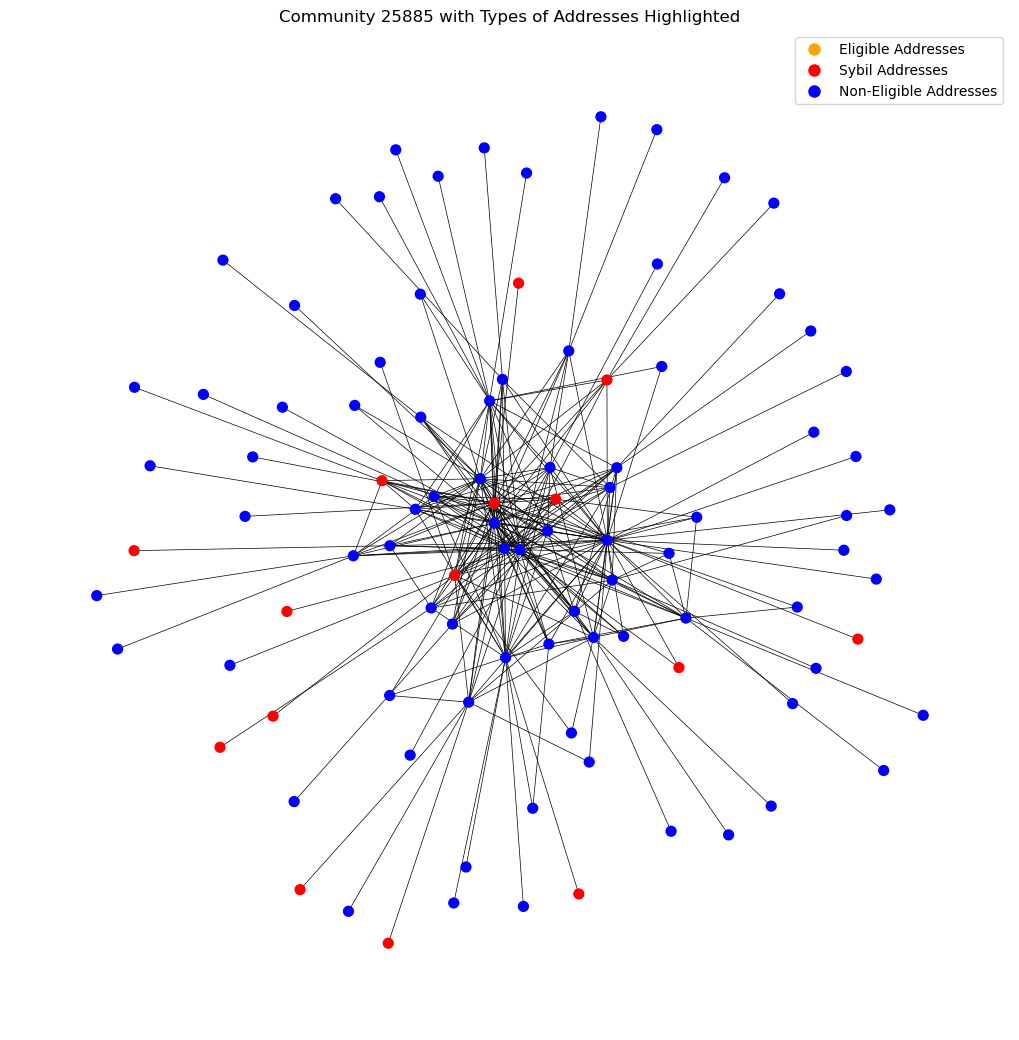

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load eligible and Sybil addresses
eligible_addresses = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eligibleAddresses.csv')['address'].tolist()
sybil_attackers = pd.read_csv('C:/Users/elnag/Documents/BAM/Master thesis/HOPdata/Final code and data/eliminatedSybilAttackers.csv')['address'].tolist()

# Create a subgraph for community 3836
subgraph_nodes = [node for node, community in partition.items() if community == 5]
subgraph = G.subgraph(subgraph_nodes)

# Assign colors based on membership in eligible and Sybil lists
node_colors = []
for node in subgraph_nodes:
    if node in eligible_addresses:
        node_colors.append('orange')  # Eligible addresses in orange
    elif node in sybil_attackers:
        node_colors.append('red')    # Sybil attackers in red
    else:
        node_colors.append('blue')   # Other nodes in blue

# Plot the subgraph with color coding
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, k=0.05)
nx.draw(subgraph, pos, node_color=node_colors, node_size=50, width=0.5)

# Add legend
legend_labels = ['Eligible Addresses', 'Sybil Addresses', 'Non-Eligible Addresses']
legend_colors = ['orange', 'red', 'blue']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
plt.legend(legend_elements, legend_labels)

plt.title('Community 25885 with Types of Addresses Highlighted')
plt.show()


Graphs for section 4.5 and 4.6

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:\Users\elnag\Documents\BAM\Master thesis\HOPdata\Final code and data\sensitivity_analysis_results_v2.csv")

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Set style for all plots
plt.style.use('seaborn')

# 1. Impact of Silhouette Score Threshold (Section 4.5)
metrics = ['Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Impact of Silhouette Score Threshold on Clustering Performance', fontsize=14)

for i, metric in enumerate(metrics):
    for method in df['Method'].unique():
        data = df[(df['Method'] == method) & (df['Community Size Threshold'] == 5)].sort_values('Silhouette Threshold')
        axes[i].plot(data['Silhouette Threshold'], data[metric], label=method, marker='o')
    axes[i].set_xlabel('Silhouette Score Threshold')
    axes[i].set_ylabel(metric)
    axes[i].set_title(metric)
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.savefig('silhouette_threshold_impact.png', dpi=300, bbox_inches='tight')
plt.close()


print("All graphs have been generated and saved.")

C:\Users\elnag\AppData\Local\Temp\ipykernel_1652\395070171.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


All graphs have been generated and saved.
